In [1]:
from grid2op.Agent import BaseAgent
from grid2op.Converter.IdToAct import IdToAct

from grid2op.multi_agent.ma_typing import LocalObservation, LocalObservationSpace, \
    LocalAction, LocalActionSpace 

from grid2op import make
from grid2op.Action.PlayableAction import PlayableAction
from grid2op.Action import BaseAction
from grid2op.multi_agent.multiAgentEnv import MultiAgentEnv
import numpy as np
from grid2op.multi_agent.multi_agentExceptions import *

    
import numpy as np

from lightsim2grid import LightSimBackend
bk_cls = LightSimBackend

action_domains = {
    'agent_0' : [0,1,2,3, 4],
    'agent_1' : [5,6,7,8,9,10,11,12,13]
}
env_name = "l2rpn_case14_sandbox"#"educ_case14_storage"
env = make(env_name, test=False, backend = bk_cls(),
                action_class=PlayableAction, _add_to_name="_test_ma")


ma_env = MultiAgentEnv(env, action_domains, copy_env=False)

ma_env.seed(0)
obs = ma_env.reset()
        

/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:123: UserWarning: Rules can not be changed in this version.
  warnings.warn("Rules can not be changed in this version.")
/home/najarfar/Internship/Grid2Op/grid2op/multi_agent/multiAgentEnv.py:129: UserWarning: The central env has been heavily modified (parameters and reset) !
  warnings.warn("The central env has been heavily modified (parameters and reset) !")


In [2]:
results_ma01 = dict()
results_ma10 = dict()
results_ma11 = dict()
results_ma00 = dict()

results_ma01['local_actions'] = []
results_ma10['local_actions'] = []
results_ma11['local_actions'] = []
results_ma00['local_actions'] = []

results_ma01['observations'] = []
results_ma10['observations'] = []
results_ma11['observations'] = []
results_ma00['observations'] = []

res_ma01 = np.load("res_ma01_20/res_ma19.npy", allow_pickle=True)[None][0]
res_ma10 = np.load("res_ma10_20/res_ma19.npy", allow_pickle=True)[None][0]
res_ma11 = np.load("res_ma11_20/res_ma19.npy", allow_pickle=True)[None][0]
res_ma00 = np.load("res_ma00_20/res_ma19.npy", allow_pickle=True)[None][0]

results_ma01['episode_len'] = res_ma01['episode_len'] 
results_ma10['episode_len'] = res_ma10['episode_len']
results_ma11['episode_len'] = res_ma11['episode_len']
results_ma00['episode_len'] = res_ma00['episode_len']


episodes = 20
for episode in range(episodes):
    results_ma01['local_actions'].append(np.load(f"res_ma01_20/local_actions{episode}.npy", allow_pickle=True)[None][0])
    results_ma10['local_actions'].append(np.load(f"res_ma10_20/local_actions{episode}.npy", allow_pickle=True)[None][0])
    results_ma11['local_actions'].append(np.load(f"res_ma11_20/local_actions{episode}.npy", allow_pickle=True)[None][0])
    results_ma00['local_actions'].append(np.load(f"res_ma00_20/local_actions{episode}.npy", allow_pickle=True)[None][0])
    
    results_ma01['observations'].append(np.load(f"res_ma01_20/observations{episode}.npy", allow_pickle=True)[None][0])
    results_ma10['observations'].append(np.load(f"res_ma10_20/observations{episode}.npy", allow_pickle=True)[None][0])
    results_ma11['observations'].append(np.load(f"res_ma11_20/observations{episode}.npy", allow_pickle=True)[None][0])
    results_ma00['observations'].append(np.load(f"res_ma00_20/observations{episode}.npy", allow_pickle=True)[None][0])


In [3]:
episodes = len(results_ma00['info_history'])

is_illegal_ma11 = [[] for _ in range(episodes)]
is_illegal_ma10 = [[] for _ in range(episodes)]
is_illegal_ma01 = [[] for _ in range(episodes)]
is_illegal_ma00 = [[] for _ in range(episodes)]

#reason_illegal_ma = [[] for _ in range(episodes)]
#reason_illegal_ma_wo = [[] for _ in range(episodes)]

for episode in range(episodes):
    for info in results_ma00['info_history'][episode]:
        is_illegal_ma00[episode].append(info['action_is_illegal'])
        #if is_illegal_ma00[episode][-1]:
        #    reason_illegal_ma[episode].append(info['reason_illegal'])
            
    for info in results_ma01['info_history'][episode]:
        is_illegal_ma01[episode].append(info['action_is_illegal'])
    
    for info in results_ma10['info_history'][episode]:
        is_illegal_ma10[episode].append(info['action_is_illegal'])
    
    for info in results_ma11['info_history'][episode]:
        is_illegal_ma11[episode].append(info['action_is_illegal'])
            
assert np.concatenate(is_illegal_ma00).sum() == 0
assert np.concatenate(is_illegal_ma10).sum() == 0
assert np.concatenate(is_illegal_ma01).sum() == 0
assert np.concatenate(is_illegal_ma11).sum() == 0

In [35]:
episodes = 10
do_nothings = {
    agent : ma_env.action_spaces[agent]({})
    for agent in ma_env.agents
}

is_do_nothing00 = {
    agent : [
        np.array([
            results_ma00['local_actions'][episode][t][agent] \
            ==\
            do_nothings[agent]
            for t in range(results_ma00['episode_len'][episode])
        ])
        for episode in range(episodes)
    ]
    for agent in ma_env.agents
}

is_do_nothing01 = {
    agent : [
        np.array([
            results_ma01['local_actions'][episode][t][agent] \
            ==\
            do_nothings[agent]
            for t in range(results_ma01['episode_len'][episode])
        ])
        for episode in range(episodes)
    ]
    for agent in ma_env.agents
}

is_do_nothing10 = {
    agent : [
        np.array([
            results_ma10['local_actions'][episode][t][agent] \
            ==\
            do_nothings[agent]
            for t in range(results_ma10['episode_len'][episode])
        ])
        for episode in range(episodes)
    ]
    for agent in ma_env.agents
}

is_do_nothing11 = {
    agent : [
        np.array([
            results_ma11['local_actions'][episode][t][agent] \
            ==\
            do_nothings[agent]
            for t in range(results_ma11['episode_len'][episode])
        ])
        for episode in range(episodes)
    ]
    for agent in ma_env.agents
}


due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _se

## Correlation with timestep

### Agent 1

In [36]:
import matplotlib.pyplot as plt
w = 5

y00 = np.zeros(results_ma00['episode_len'][0])
y11 = np.zeros(results_ma11['episode_len'][0])
y10 = np.zeros(results_ma10['episode_len'][0])
y01 = np.zeros(results_ma01['episode_len'][0])

for episode in range(episodes):
    y00[np.where(~is_do_nothing00['agent_1'][episode])[0]] += 1
    y11[np.where(~is_do_nothing11['agent_1'][episode])[0]] += 1
    y10[np.where(~is_do_nothing10['agent_1'][episode])[0]] += 1
    y01[np.where(~is_do_nothing01['agent_1'][episode])[0]] += 1

plt.bar(np.arange(results_ma00['episode_len'][0]), y00, width=w)
plt.show()
plt.bar(np.arange(results_ma11['episode_len'][0]), y11, width=w)
plt.show()
plt.bar(np.arange(results_ma10['episode_len'][0]), y10, width=w)
plt.show()
plt.bar(np.arange(results_ma01['episode_len'][0]), y01, width=w)
plt.show()

IndexError: index 2578 is out of bounds for axis 0 with size 2540

### Agent 0

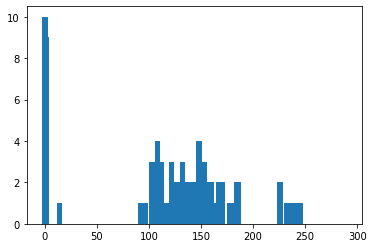

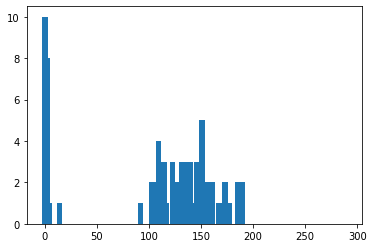

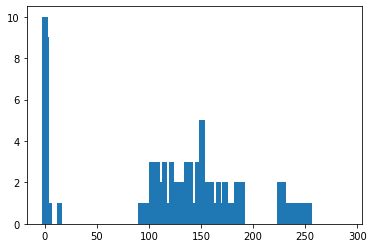

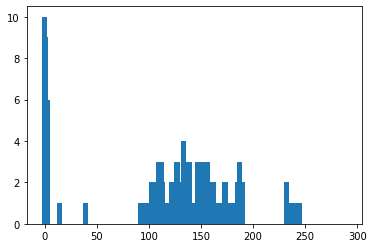

In [ ]:
import matplotlib.pyplot as plt
w = 5

y00 = np.zeros(results_ma00['episode_len'][0])
y11 = np.zeros(results_ma11['episode_len'][0])
y10 = np.zeros(results_ma10['episode_len'][0])
y01 = np.zeros(results_ma01['episode_len'][0])

for episode in range(episodes):
    y00[np.where(~is_do_nothing00['agent_0'][episode])[0]] += 1
    y11[np.where(~is_do_nothing11['agent_0'][episode])[0]] += 1
    y10[np.where(~is_do_nothing10['agent_0'][episode])[0]] += 1
    y01[np.where(~is_do_nothing01['agent_0'][episode])[0]] += 1

plt.bar(np.arange(results_ma00['episode_len'][0]), y00, width=w)
plt.show()
plt.bar(np.arange(results_ma11['episode_len'][0]), y11, width=w)
plt.show()
plt.bar(np.arange(results_ma10['episode_len'][0]), y10, width=w)
plt.show()
plt.bar(np.arange(results_ma01['episode_len'][0]), y01, width=w)
plt.show()

## Correlation with $\rho$

In [9]:
sum_rho00=    [[] for _ in range(episodes)]
mean_rho00 =   [[] for _ in range(episodes)]
max_rho00= [[] for _ in range(episodes)]
n00 = 0
rho00 = np.zeros(env.n_line)

sum_rho01=    [[] for _ in range(episodes)]
mean_rho01 =   [[] for _ in range(episodes)]
max_rho01= [[] for _ in range(episodes)]
n01 = 0
rho01 = np.zeros(env.n_line)

sum_rho10=    [[] for _ in range(episodes)]
mean_rho10 =   [[] for _ in range(episodes)]
max_rho10= [[] for _ in range(episodes)]
n10 = 0
rho10 = np.zeros(env.n_line)

sum_rho11=    [[] for _ in range(episodes)]
mean_rho11 =   [[] for _ in range(episodes)]
max_rho11= [[] for _ in range(episodes)]
n11 = 0
rho11 = np.zeros(env.n_line)

for episode in range(episodes):
    for t in range(results_ma00['episode_len'][episode]):
        
        obs = env.reset()
        obs.from_vect(results_ma00['observations'][episode][t])
        rho00 = n00*rho00/(n00+1) + obs.rho/(n00+1)
        n00+=1
        sum_rho00[episode].append(obs.rho.sum())
        mean_rho00[episode].append(obs.rho.mean())
        max_rho00[episode].append(obs.rho.max())
        
    for t in range(results_ma01['episode_len'][episode]):
        
        obs = env.reset()
        obs.from_vect(results_ma01['observations'][episode][t])
        rho01 = n01*rho01/(n01+1) + obs.rho/(n01+1)
        n01+=1
        sum_rho01[episode].append(obs.rho.sum())
        mean_rho01[episode].append(obs.rho.mean())
        max_rho01[episode].append(obs.rho.max())
    
    for t in range(results_ma10['episode_len'][episode]):
        
        obs = env.reset()
        obs.from_vect(results_ma10['observations'][episode][t])
        rho10 = n10*rho10/(n10+1) + obs.rho/(n10+1)
        n10+=1
        sum_rho10[episode].append(obs.rho.sum())
        mean_rho10[episode].append(obs.rho.mean())
        max_rho10[episode].append(obs.rho.max())
    
    for t in range(results_ma11['episode_len'][episode]):
        
        obs = env.reset()
        obs.from_vect(results_ma11['observations'][episode][t])
        rho11 = n11*rho11/(n11+1) + obs.rho/(n11+1)
        n11+=1
        sum_rho11[episode].append(obs.rho.sum())
        mean_rho11[episode].append(obs.rho.mean())
        max_rho11[episode].append(obs.rho.max())

In [30]:
np.save("max_rho00.npy", arr=max_rho00)
np.save("max_rho01.npy", arr=max_rho01)
np.save("max_rho10.npy", arr=max_rho10)
np.save("max_rho11.npy", arr=max_rho11)

/home/najarfar/anaconda3/envs/grid2op/lib/python3.9/site-packages/numpy/lib/npyio.py:518: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = np.asanyarray(arr)


### 00

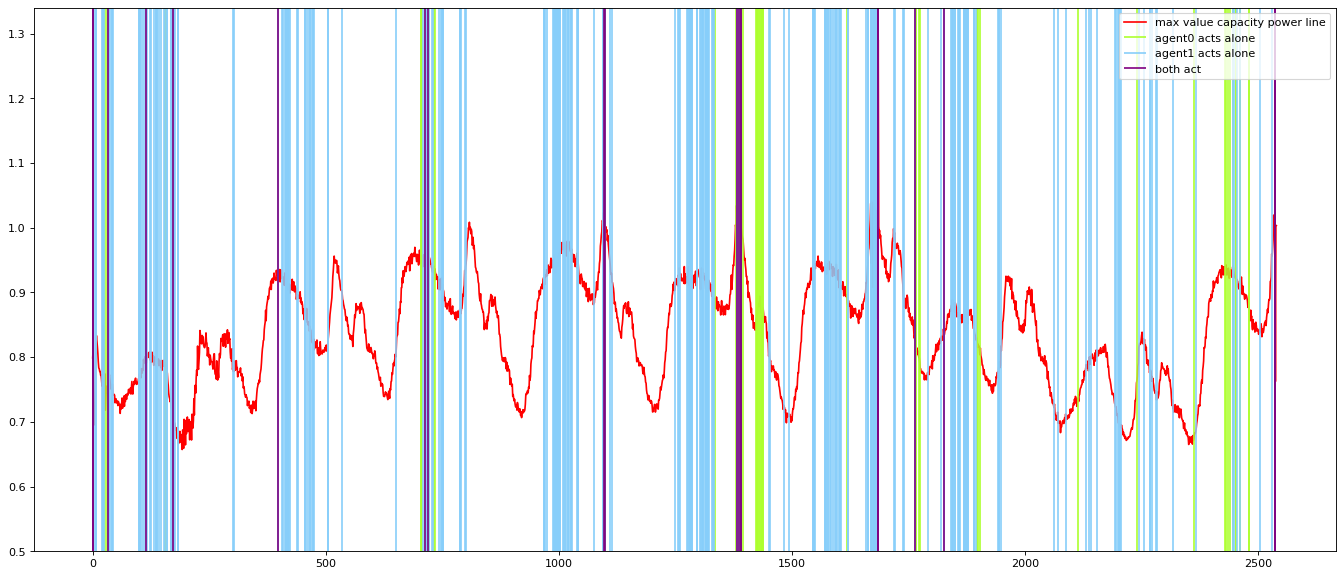

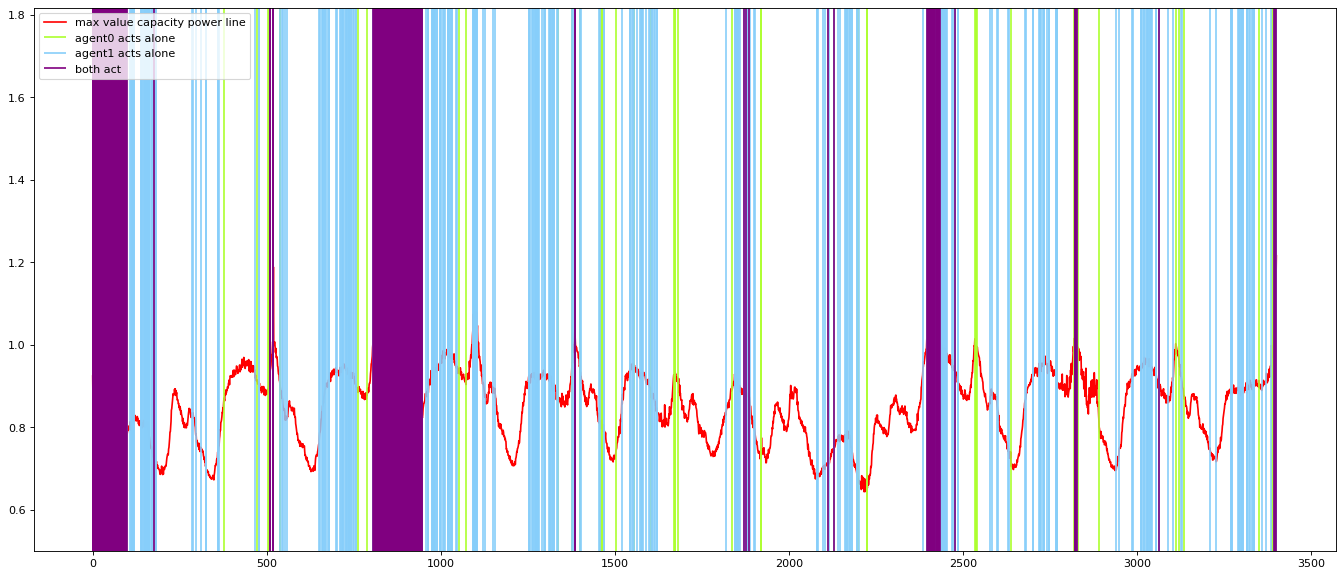

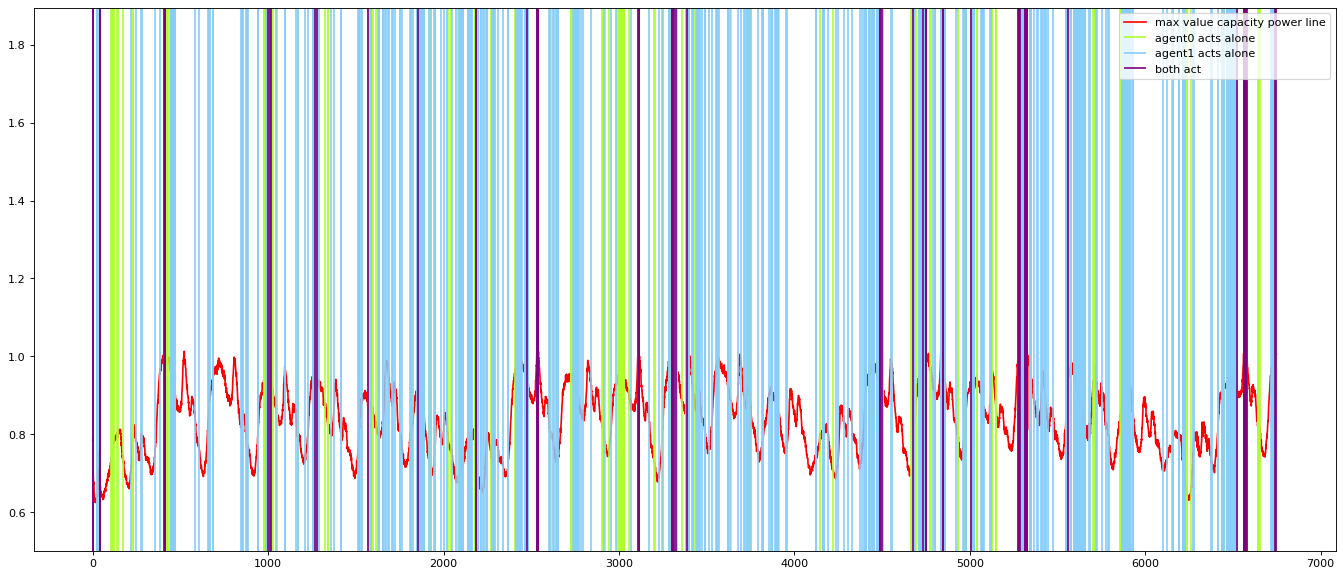

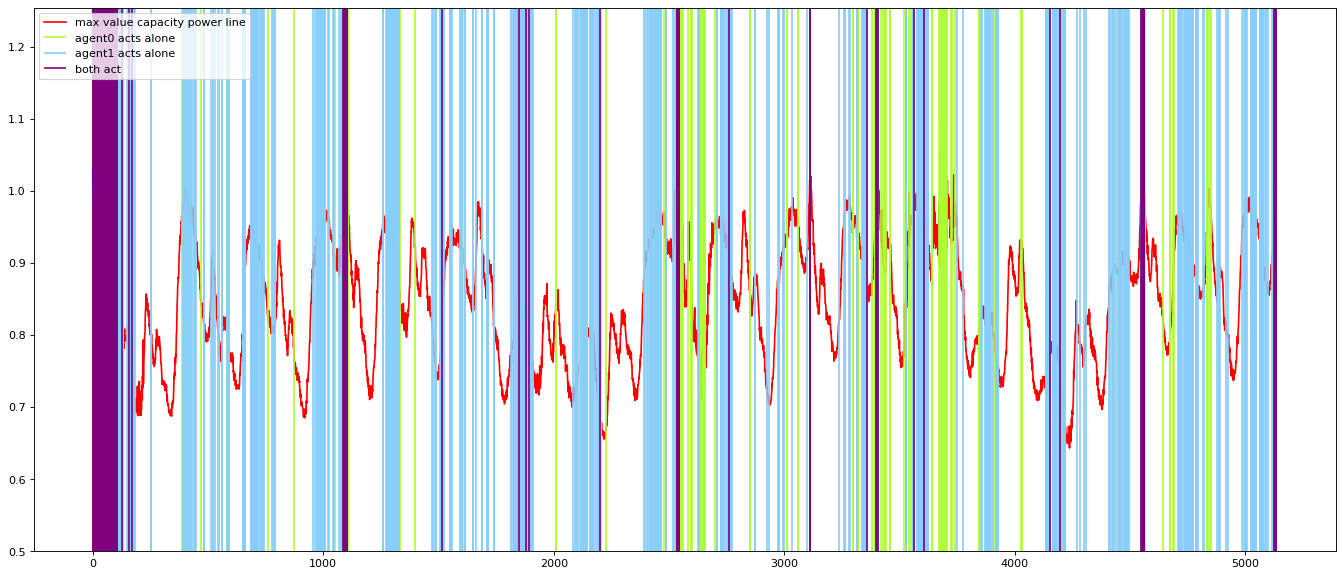

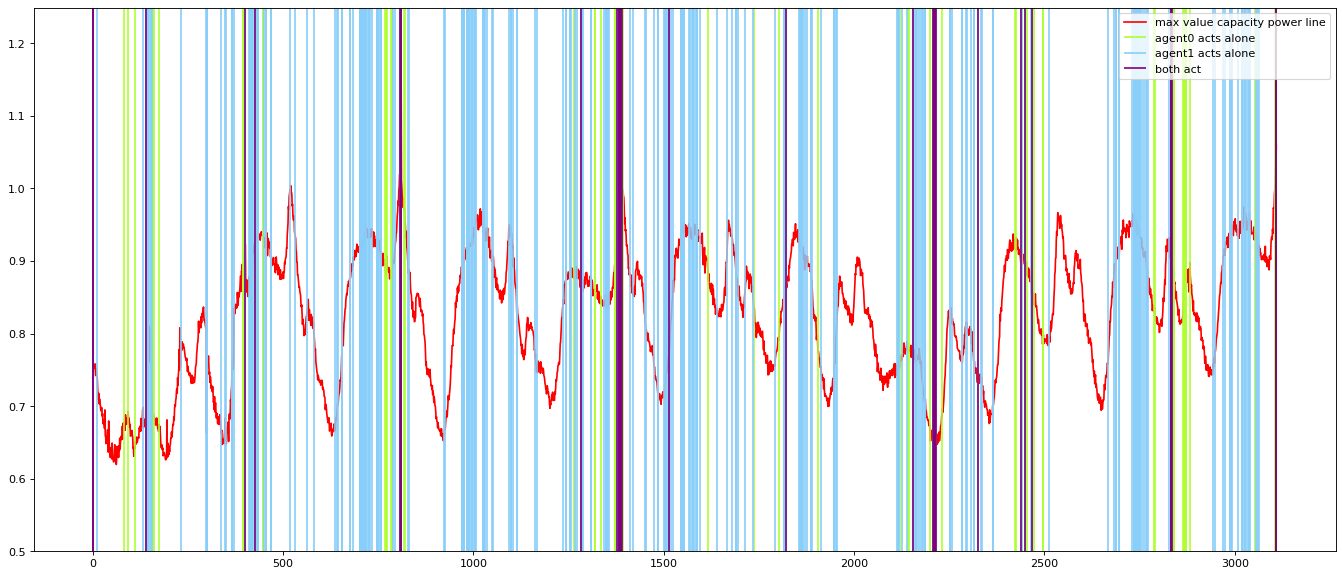

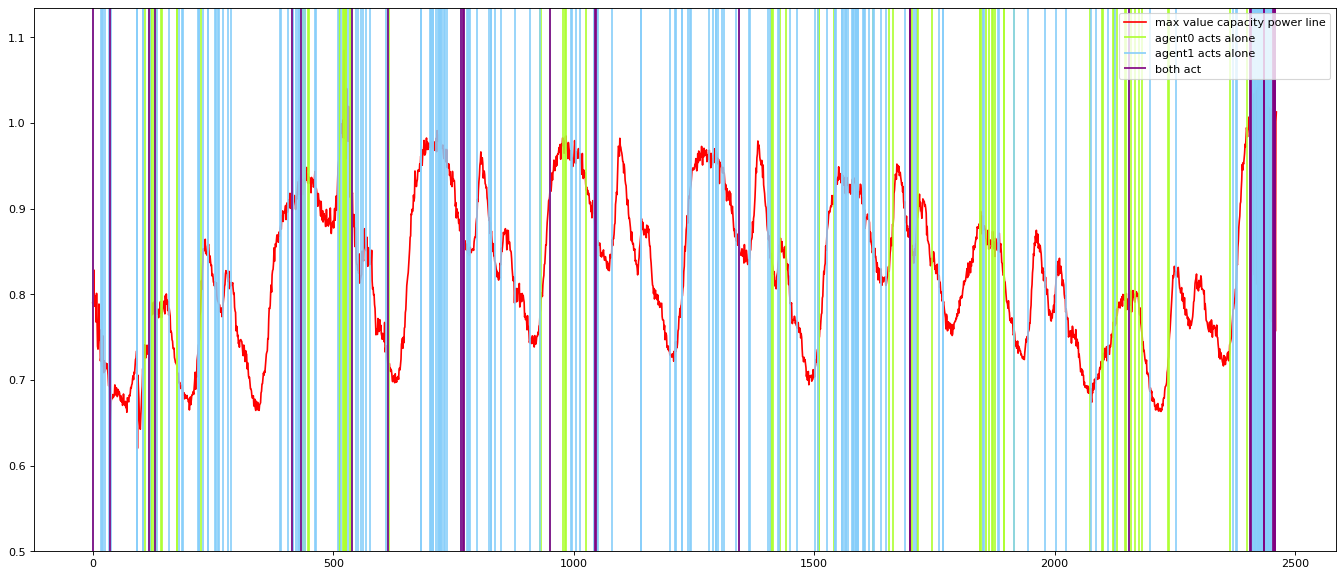

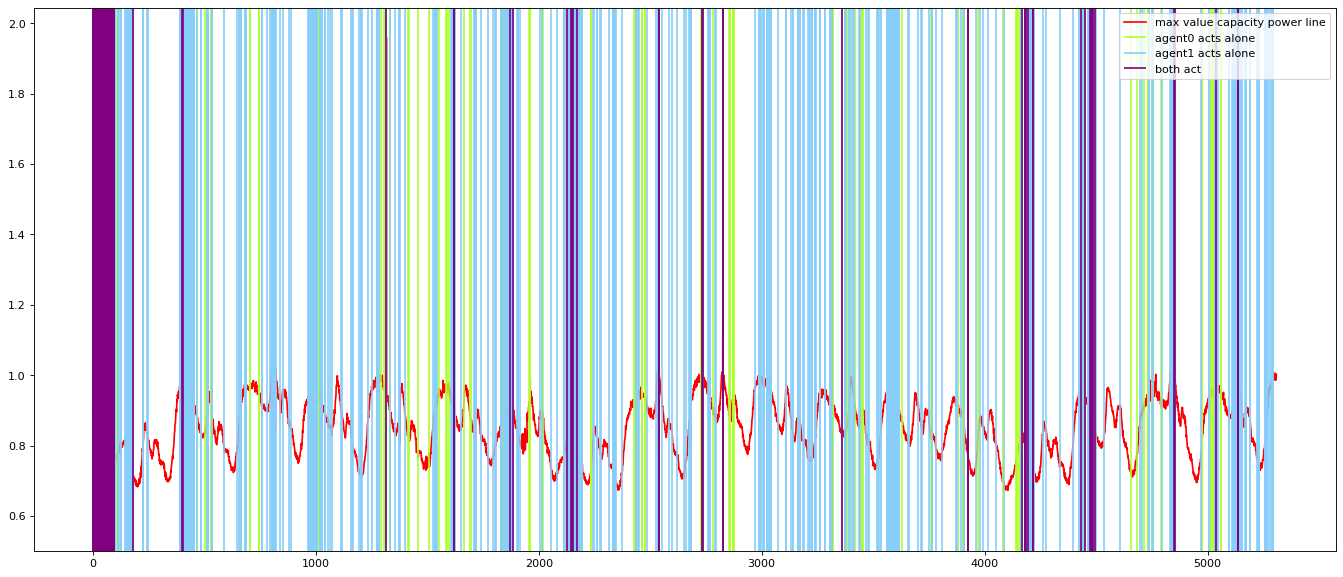

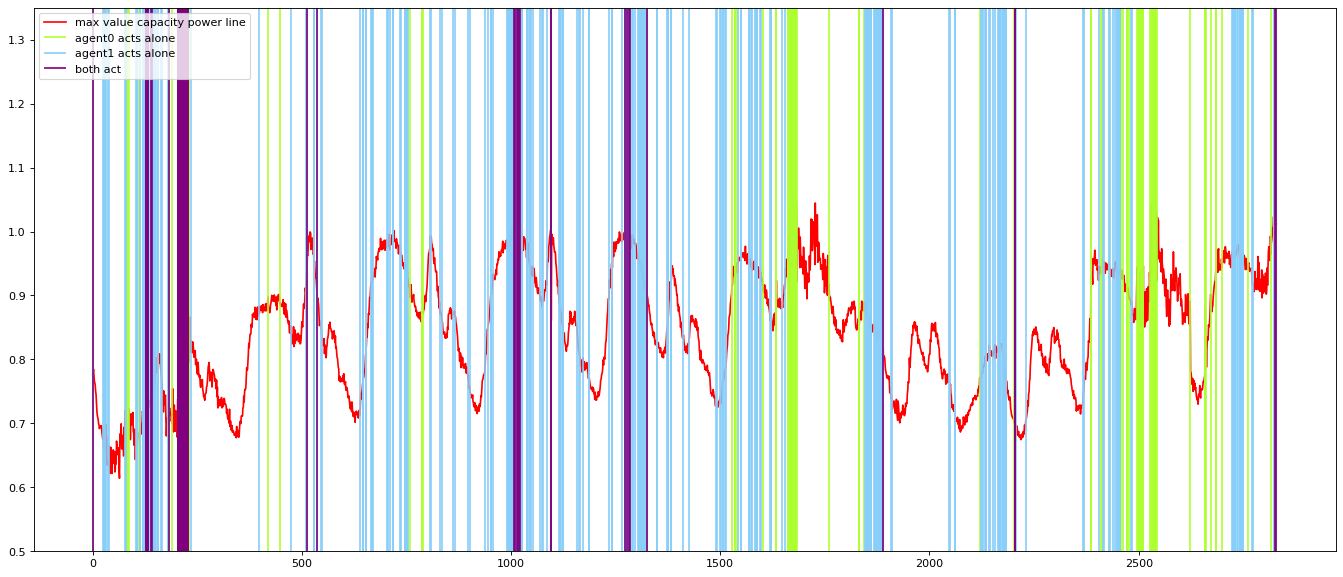

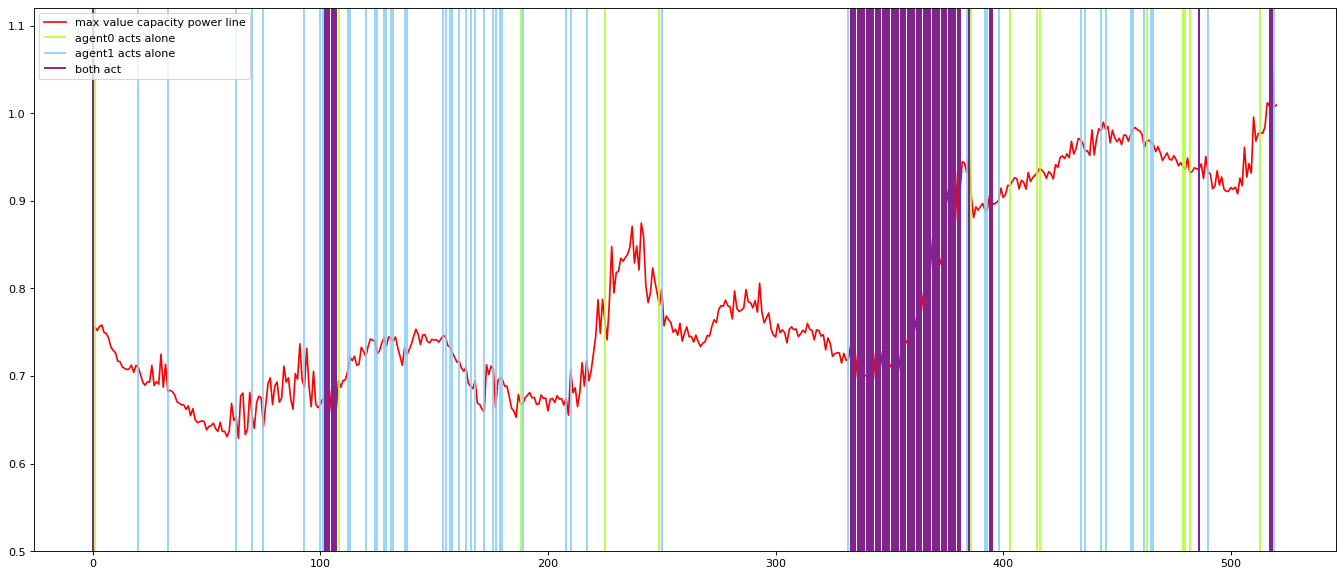

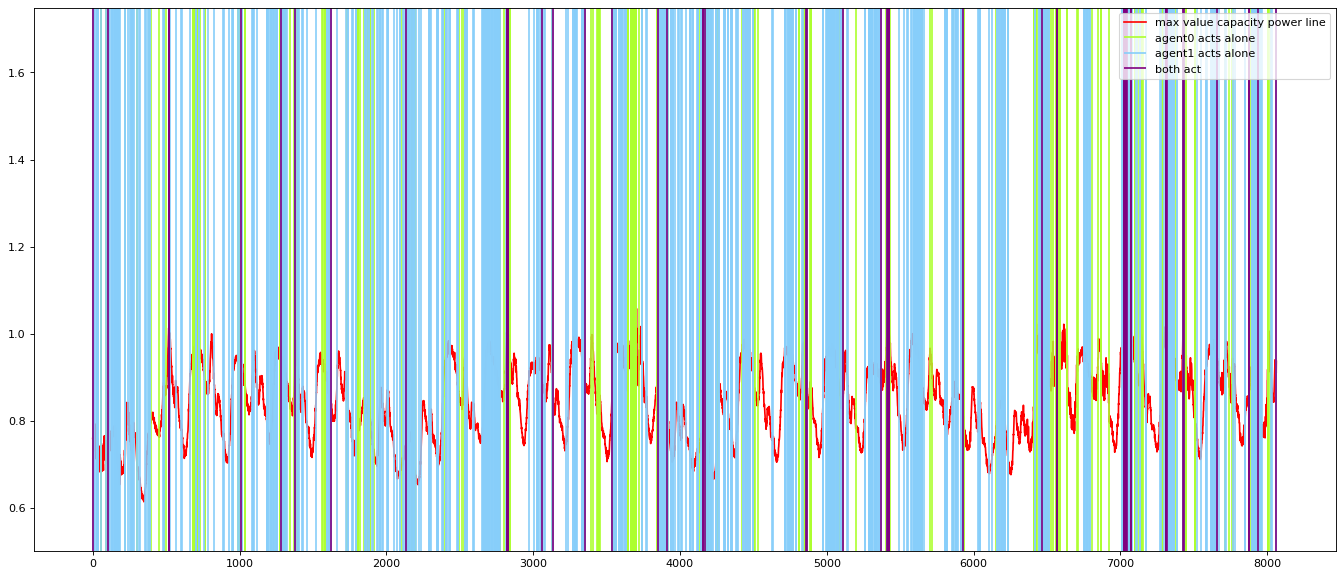

In [21]:
import matplotlib.pyplot as plt

for episode in range(episodes):
    #fig, ax1 = plt.subplots()

    #ax2 = ax1.twinx()
    y0 = np.where(~is_do_nothing00['agent_0'][episode])[0]
    y1 = np.where(~is_do_nothing00['agent_1'][episode])[0]
    y2 = np.where(~is_do_nothing00['agent_0'][episode]&~is_do_nothing00['agent_1'][episode])[0]
    m, M = (.5, max(max_rho00[episode])+.05)
    plt.figure(figsize=(21, 9), dpi=80)
    plt.plot(max_rho00[episode], color = 'red', label='max value capacity power line')
    plt.vlines(y0, ymin = m, ymax=M, label='agent0 acts alone', color='greenyellow')
    plt.vlines(y1, ymin = m, ymax=M, label='agent1 acts alone', color='lightskyblue')
    plt.vlines(y2, ymin = m, ymax=M, label='both act', color='purple')
    plt.ylim((m, M))
    #plt.title('The most overloaded power line\'s capacity over time with illegal actions occurence')
    plt.savefig(f'capa_w_actions_episode_{episode}')
    plt.legend()
    plt.show()

### 01

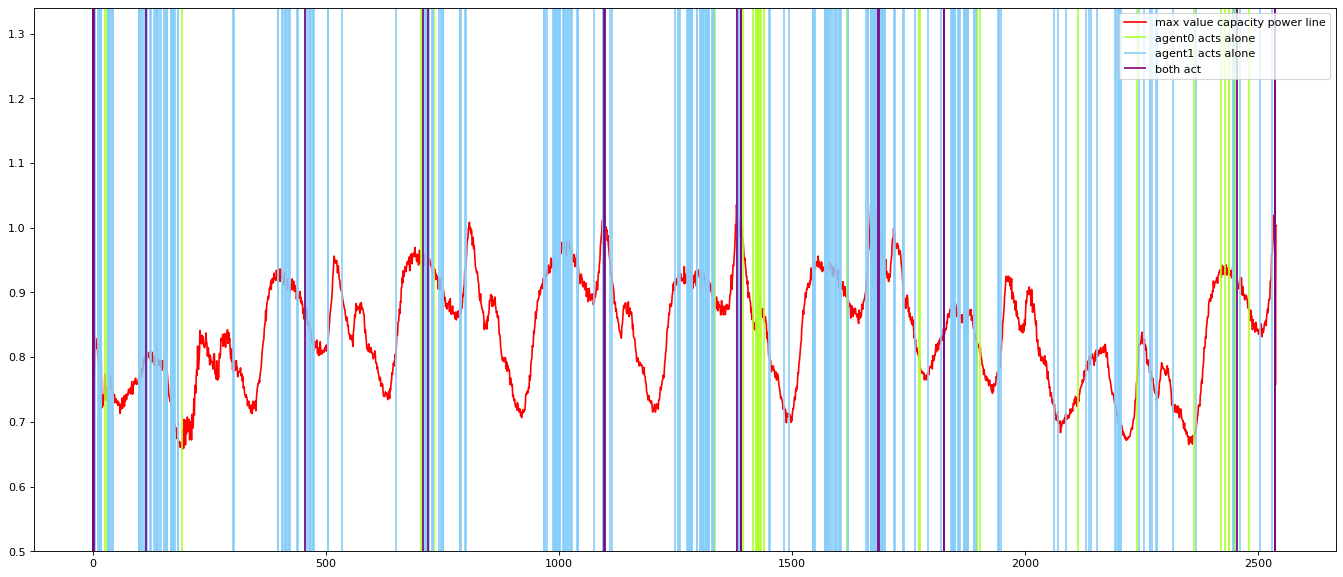

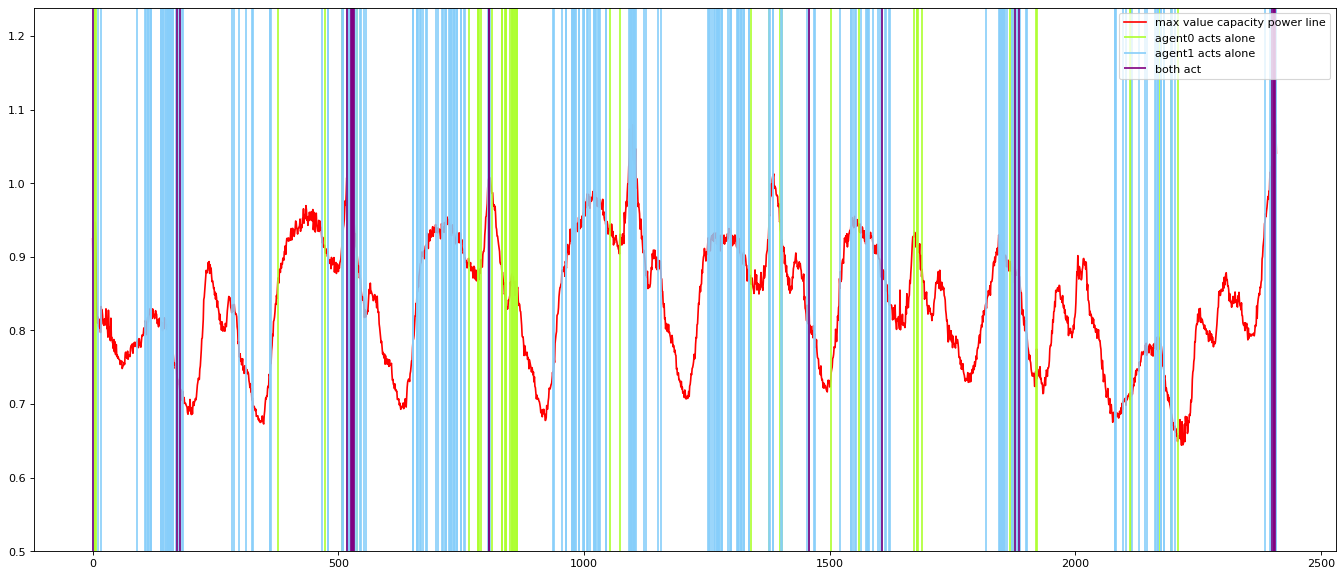

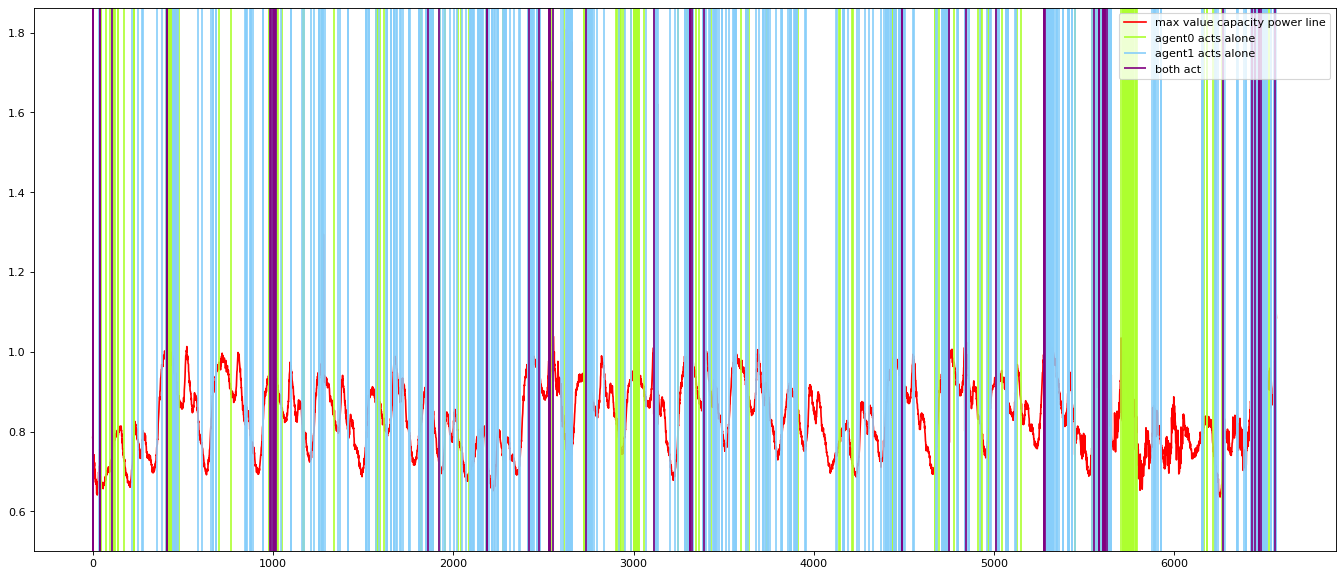

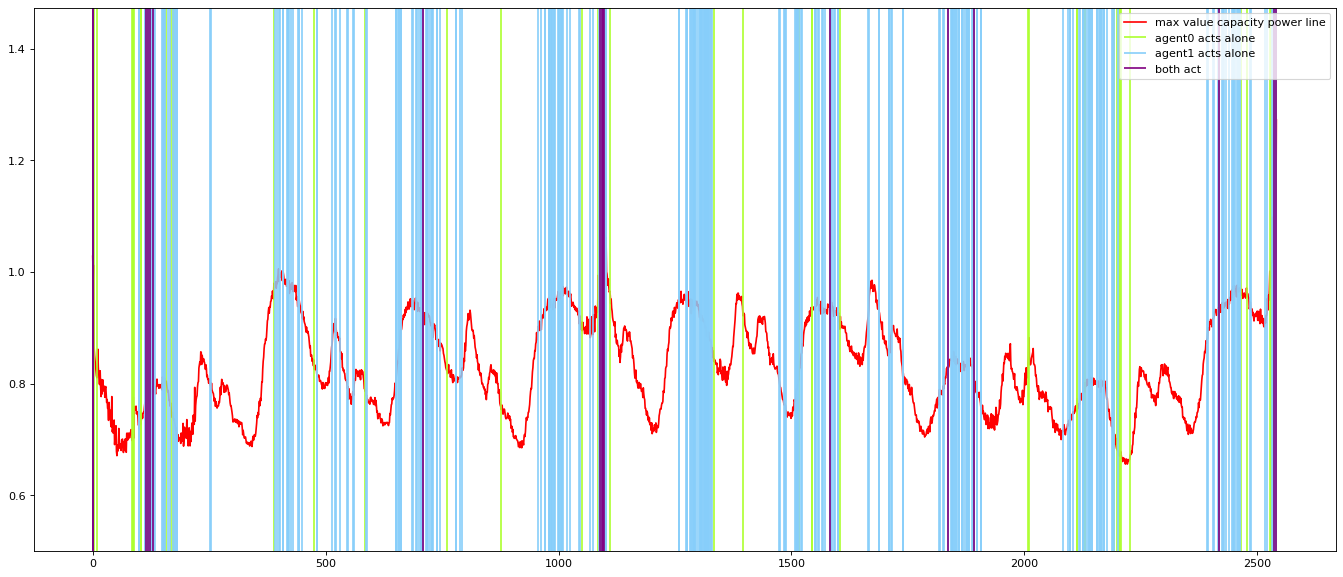

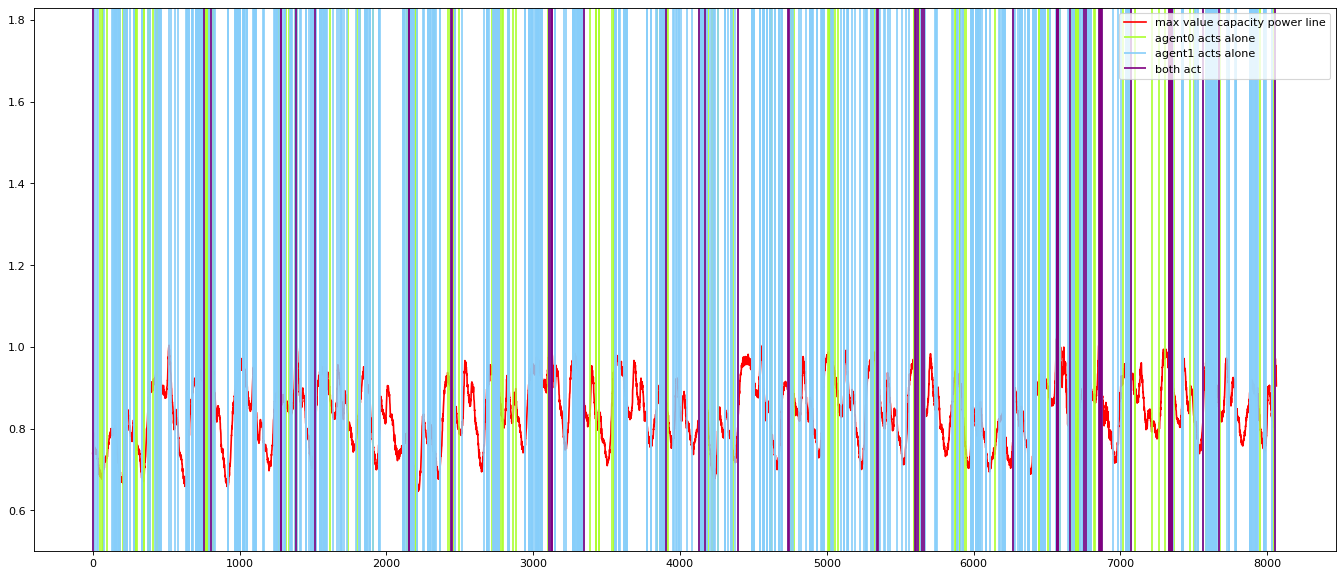

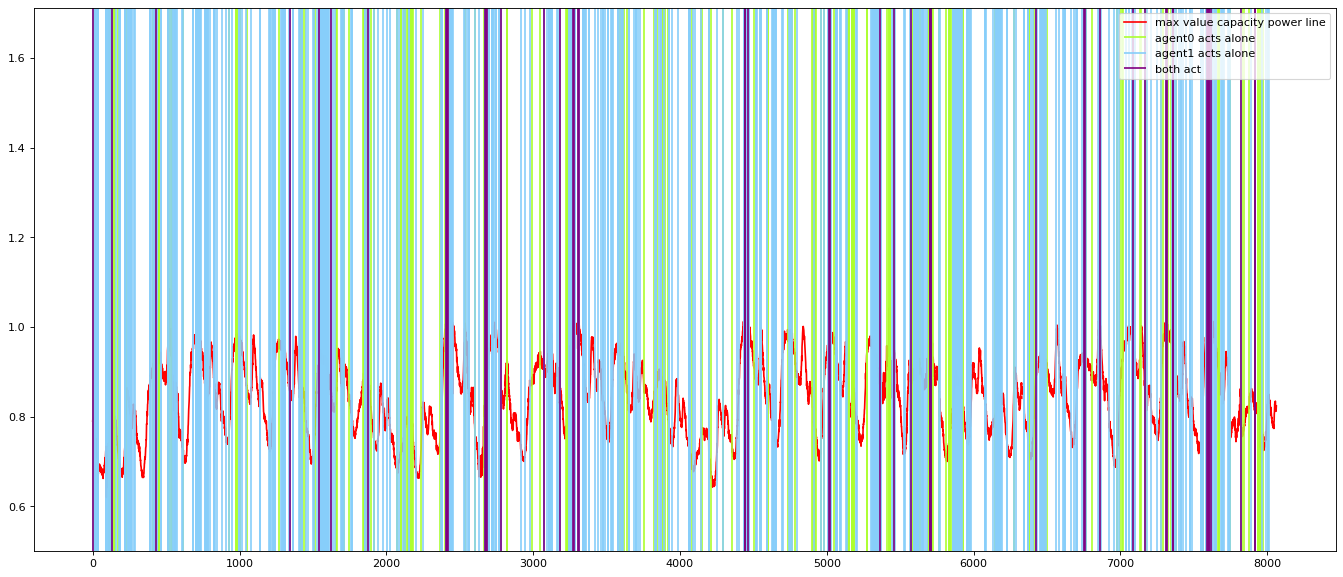

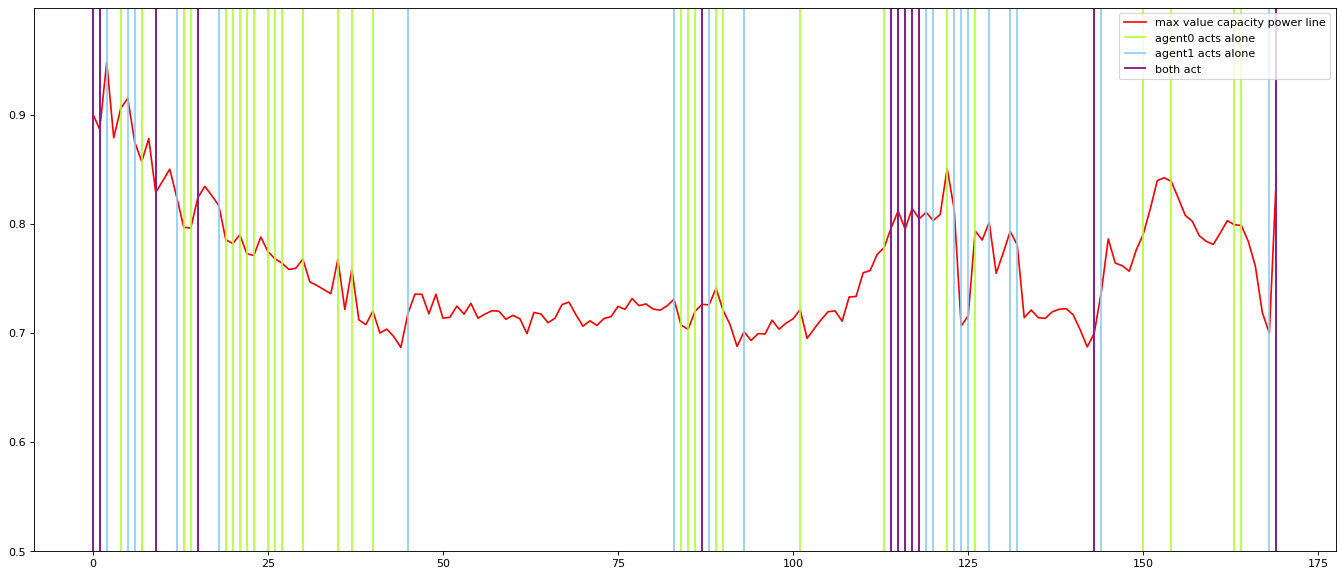

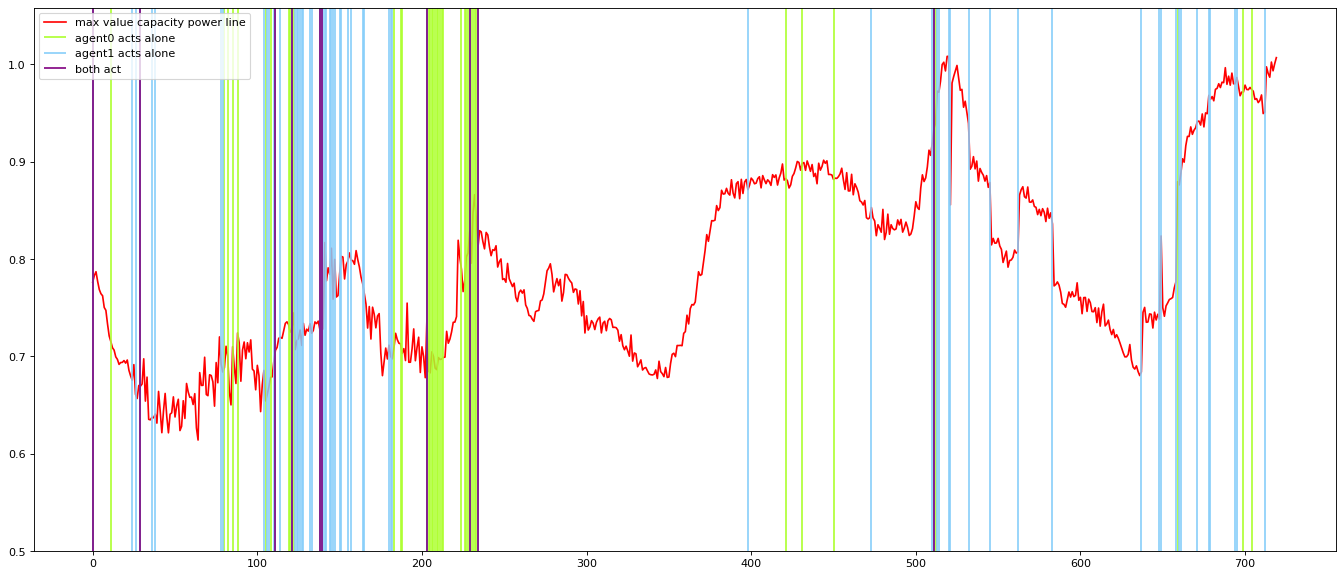

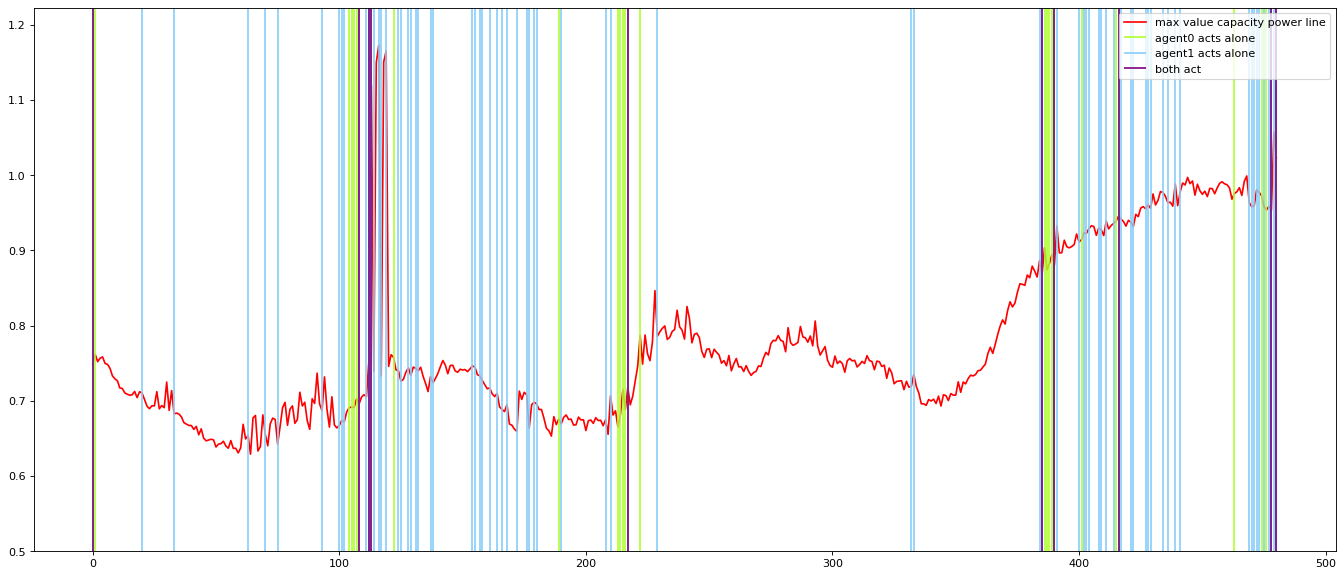

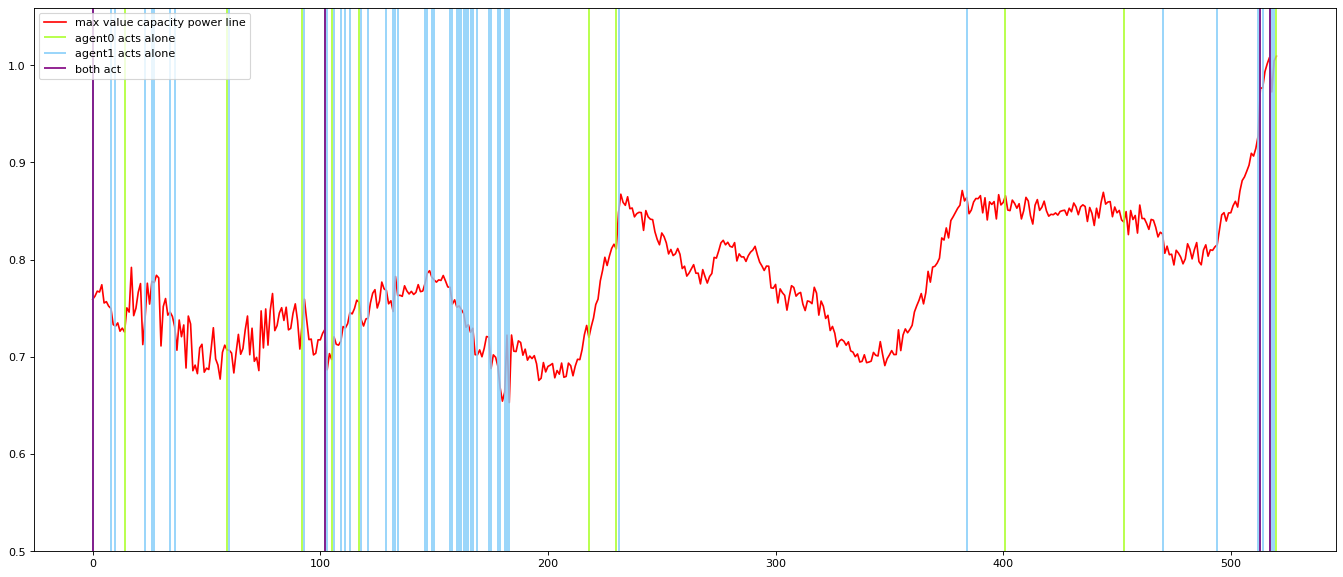

In [20]:
import matplotlib.pyplot as plt

for episode in range(episodes):
    #fig, ax1 = plt.subplots()

    #ax2 = ax1.twinx()
    y0 = np.where(~is_do_nothing01['agent_0'][episode])[0]
    y1 = np.where(~is_do_nothing01['agent_1'][episode])[0]
    y2 = np.where(~is_do_nothing01['agent_0'][episode]&~is_do_nothing01['agent_1'][episode])[0]
    m, M = (.5, max(max_rho01[episode])+.05)
    plt.figure(figsize=(21, 9), dpi=80)
    plt.plot(max_rho01[episode], color = 'red', label='max value capacity power line')
    plt.vlines(y0, ymin = m, ymax=M, label='agent0 acts alone', color='greenyellow')
    plt.vlines(y1, ymin = m, ymax=M, label='agent1 acts alone', color='lightskyblue')
    plt.vlines(y2, ymin = m, ymax=M, label='both act', color='purple')
    plt.ylim((m, M))
    #plt.title('The most overloaded power line\'s capacity over time with illegal actions occurence')
    plt.savefig(f'capa_w_actions_episode_{episode}')
    plt.legend()
    plt.show()

### 10

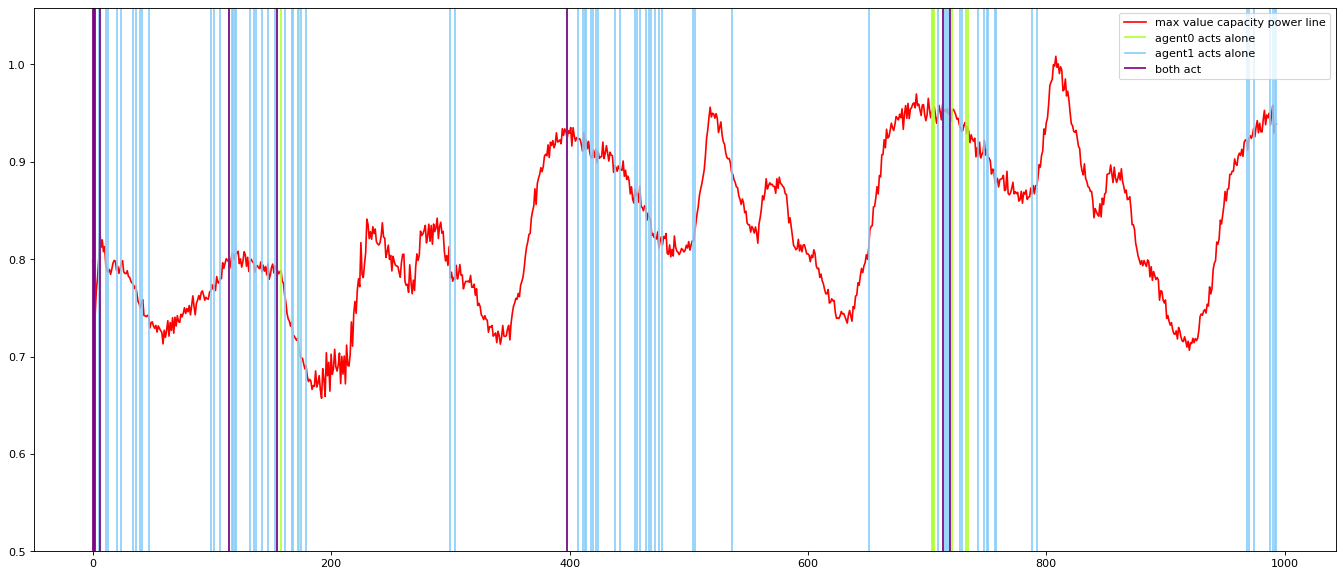

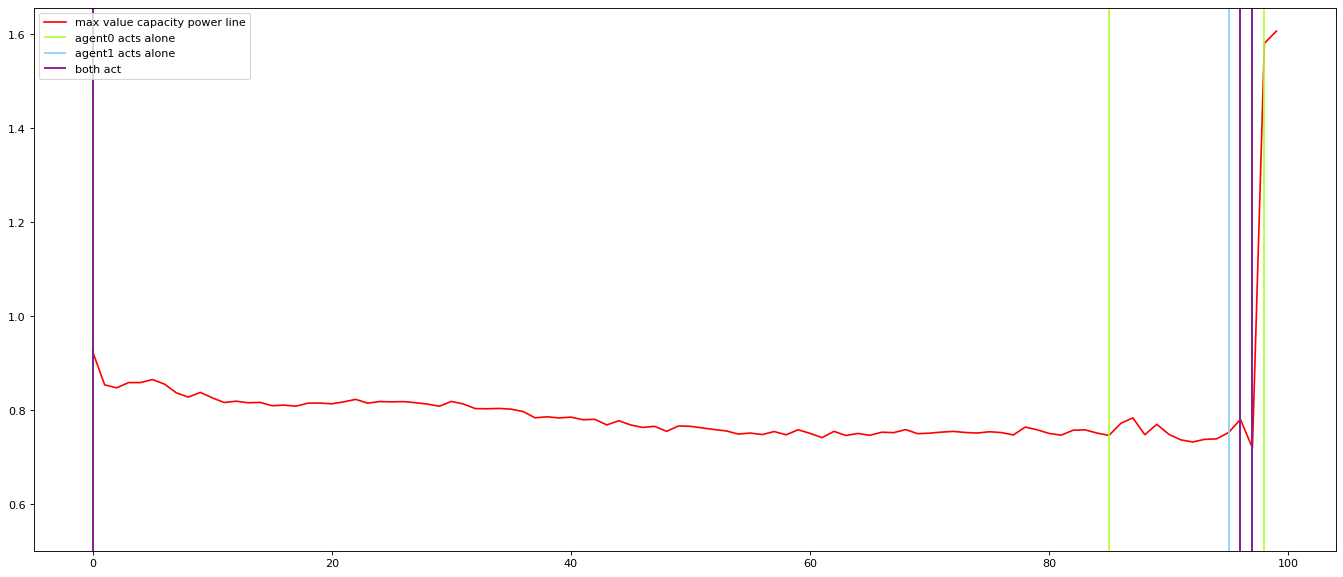

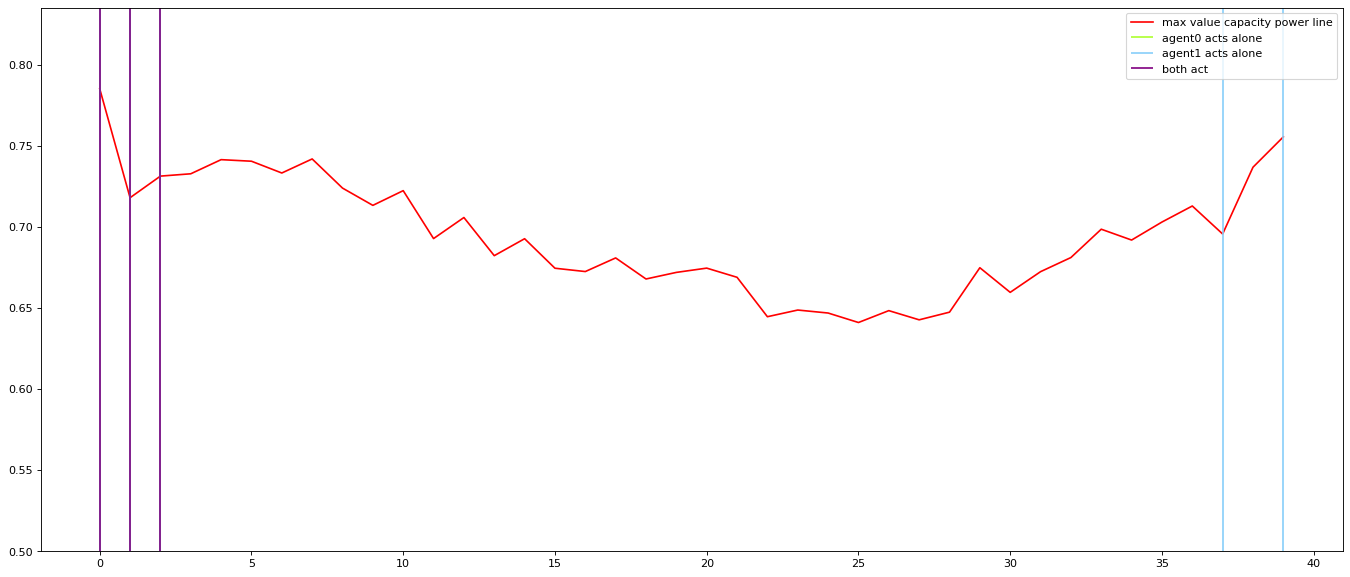

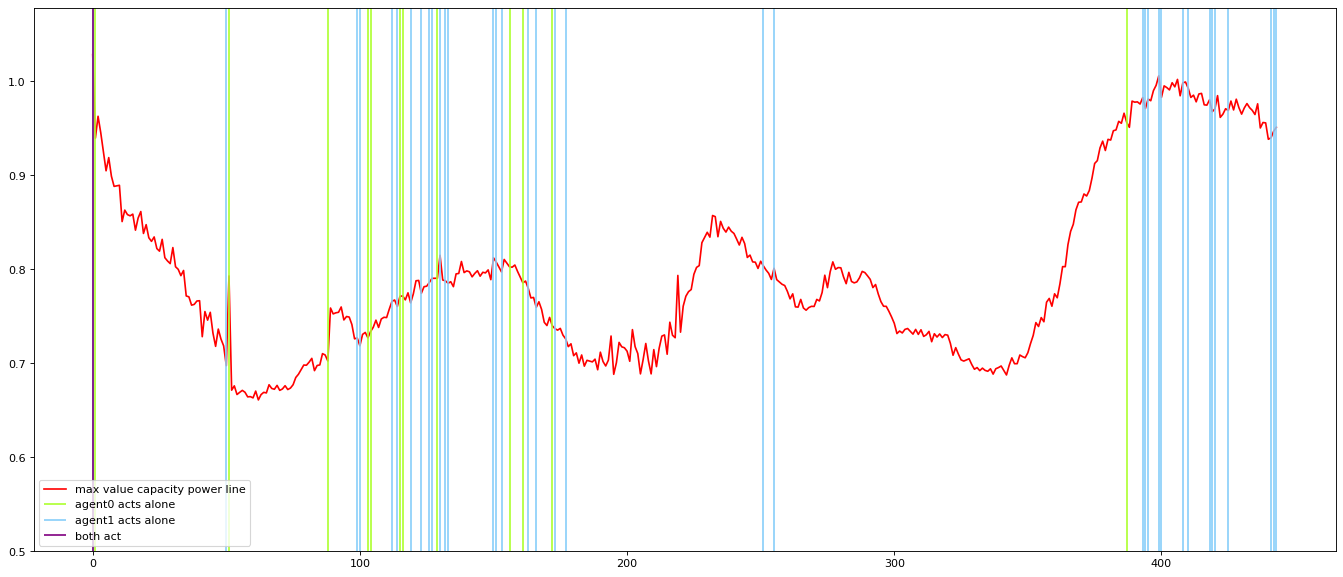

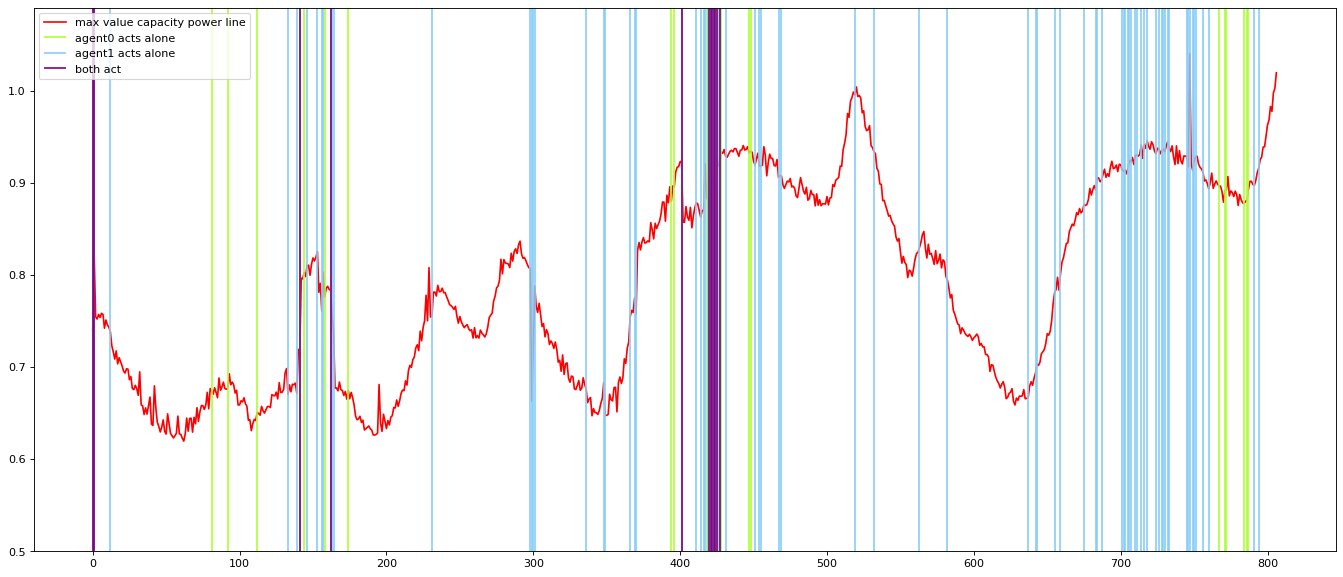

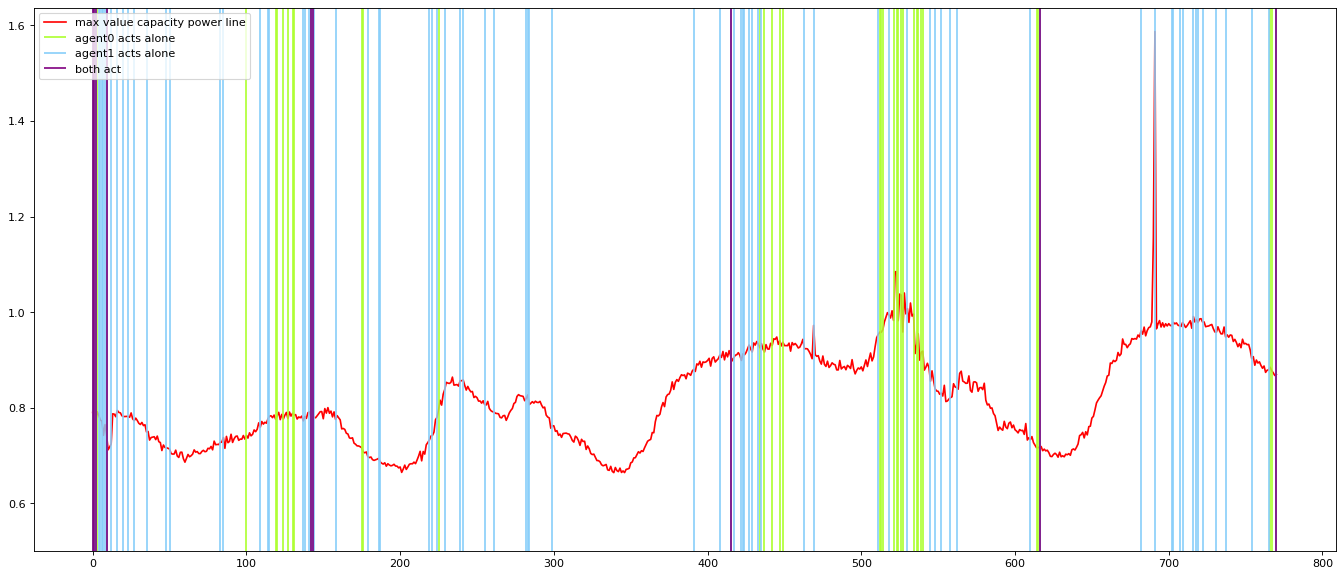

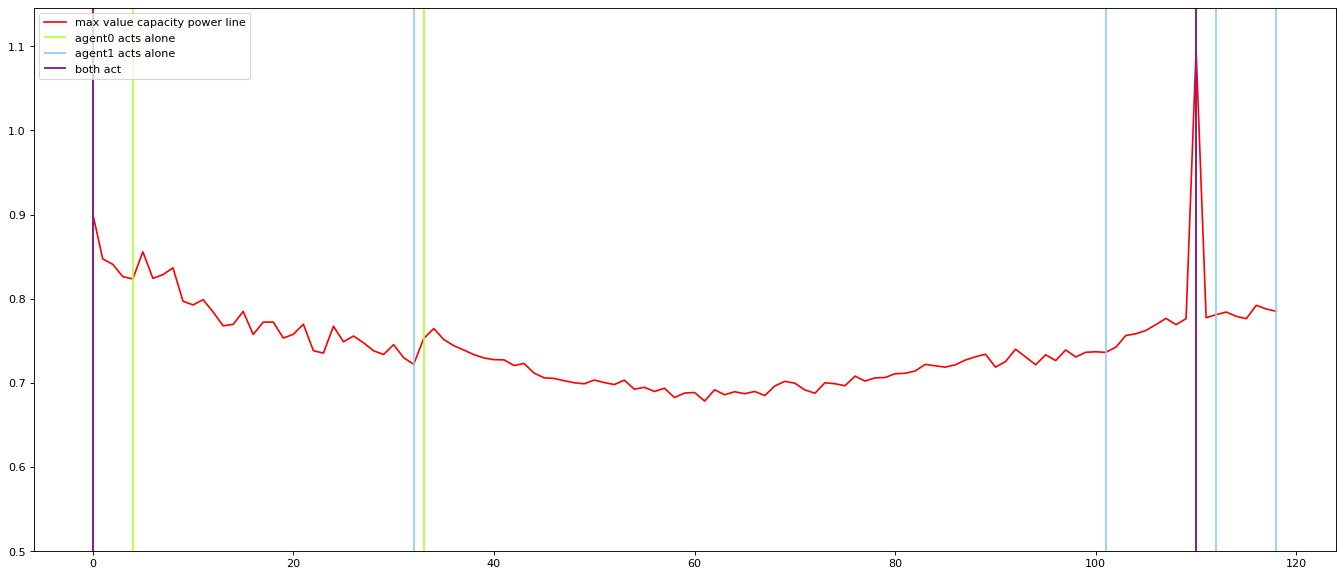

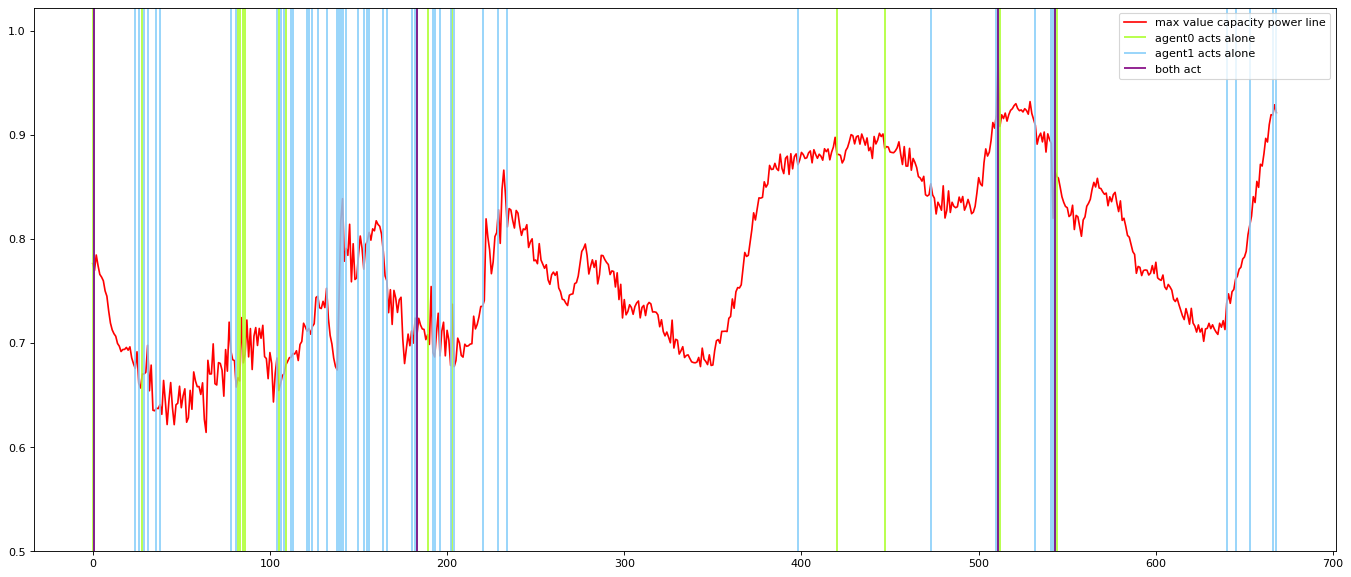

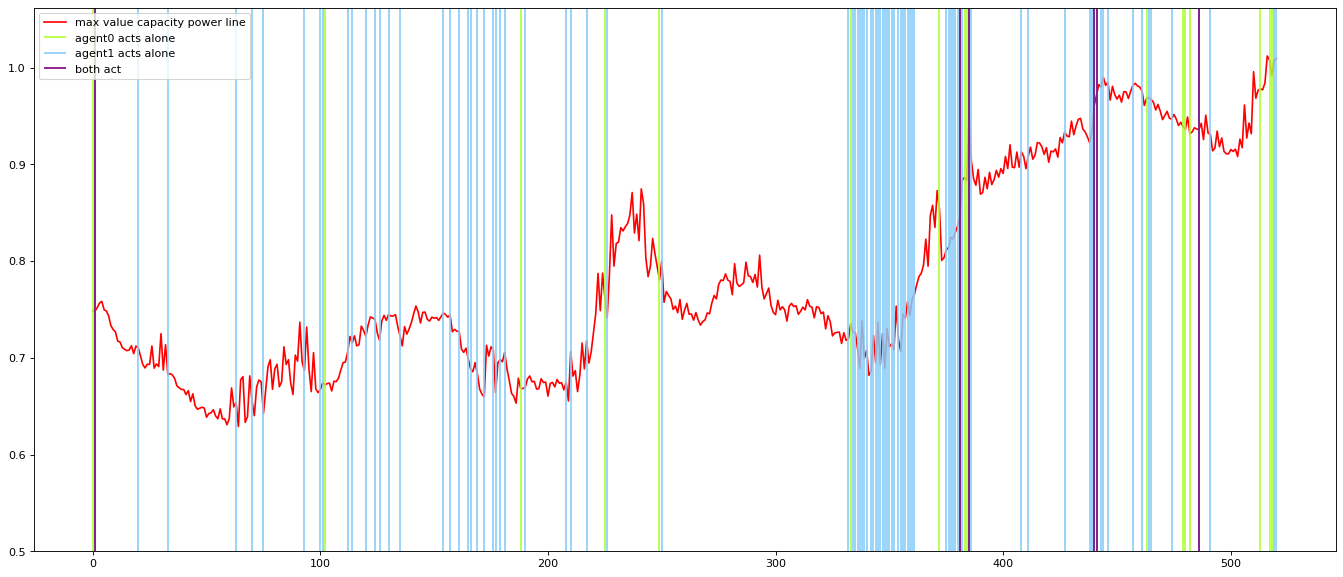

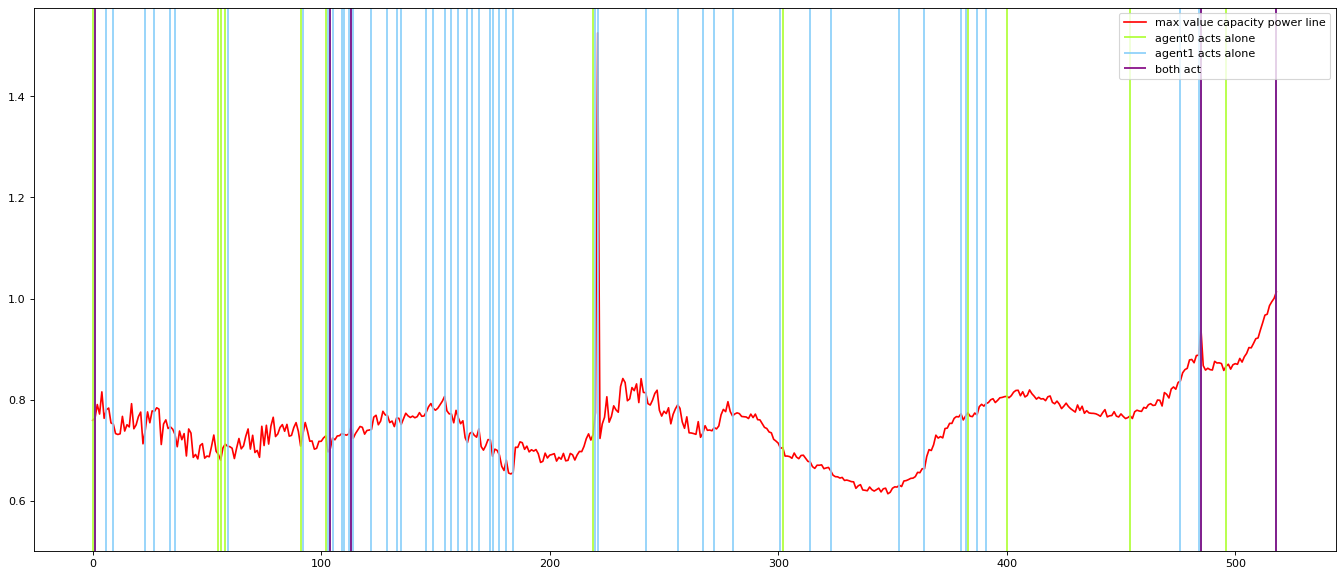

In [22]:
import matplotlib.pyplot as plt

for episode in range(episodes):
    #fig, ax1 = plt.subplots()

    #ax2 = ax1.twinx()
    y0 = np.where(~is_do_nothing10['agent_0'][episode])[0]
    y1 = np.where(~is_do_nothing10['agent_1'][episode])[0]
    y2 = np.where(~is_do_nothing10['agent_0'][episode]&~is_do_nothing10['agent_1'][episode])[0]
    plt.figure(figsize=(21, 9), dpi=80)
    m, M = (.5, max(max_rho10[episode])+.05)
    plt.plot(max_rho10[episode], color = 'red', label='max value capacity power line')
    plt.vlines(y0, ymin = m, ymax=M, label='agent0 acts alone', color='greenyellow')
    plt.vlines(y1, ymin = m, ymax=M, label='agent1 acts alone', color='lightskyblue')
    plt.vlines(y2, ymin = m, ymax=M, label='both act', color='purple')
    plt.ylim((m, M))
    #plt.title('The most overloaded power line\'s capacity over time with illegal actions occurence')
    plt.savefig(f'capa_w_actions_episode_{episode}')
    plt.legend()
    plt.show()

### 11

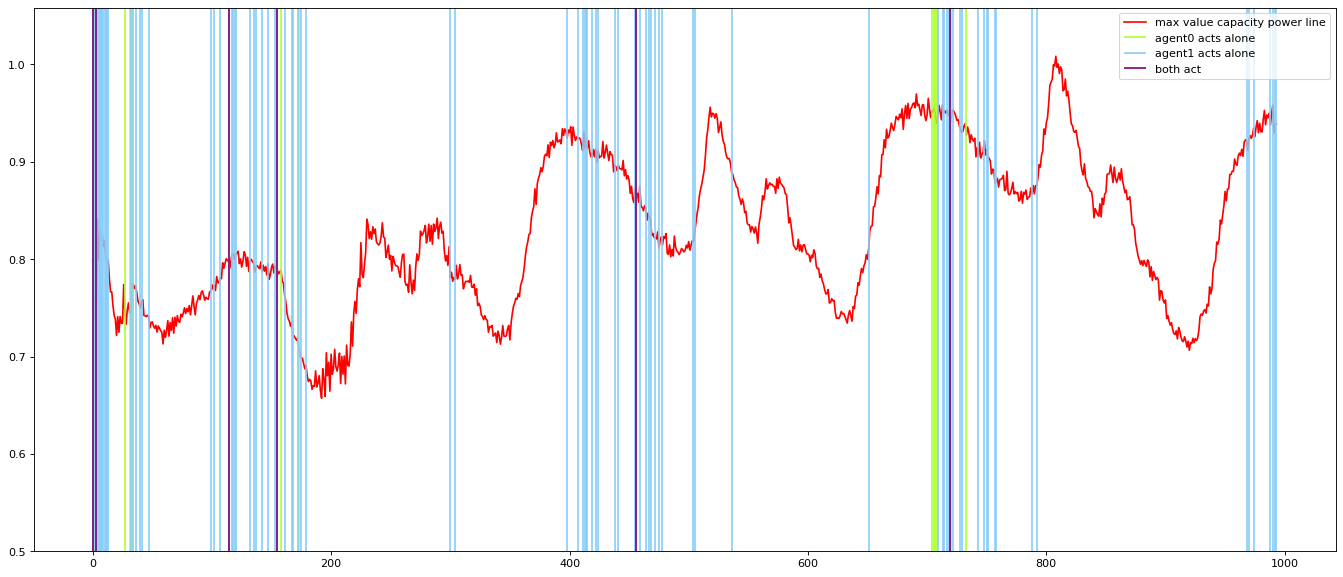

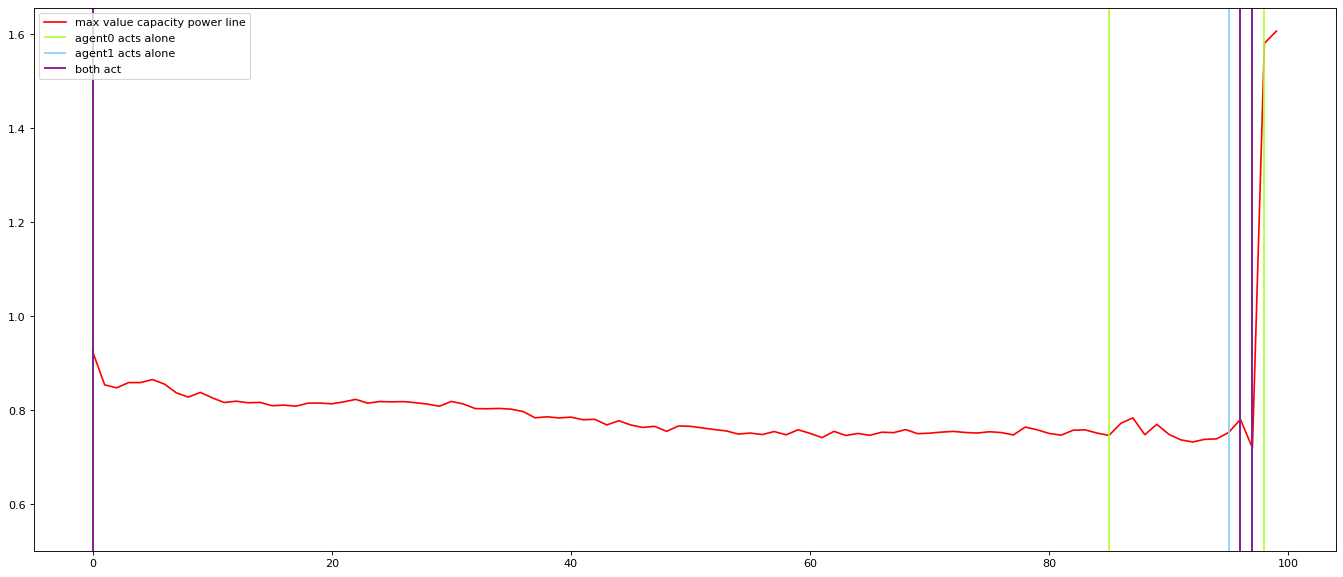

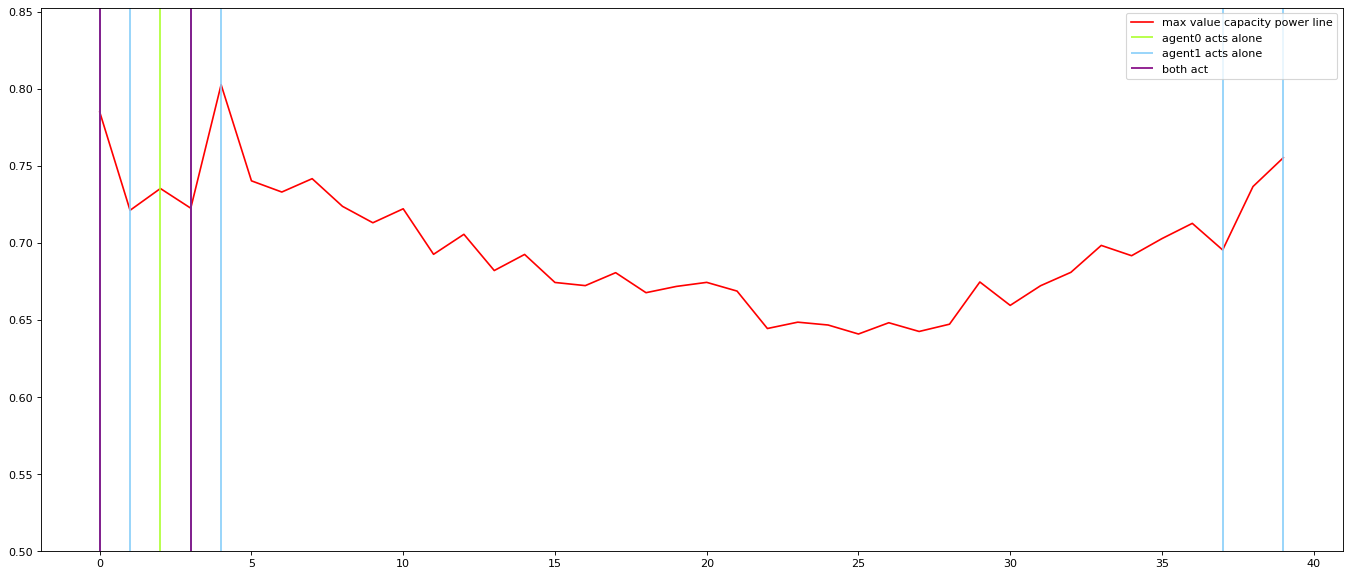

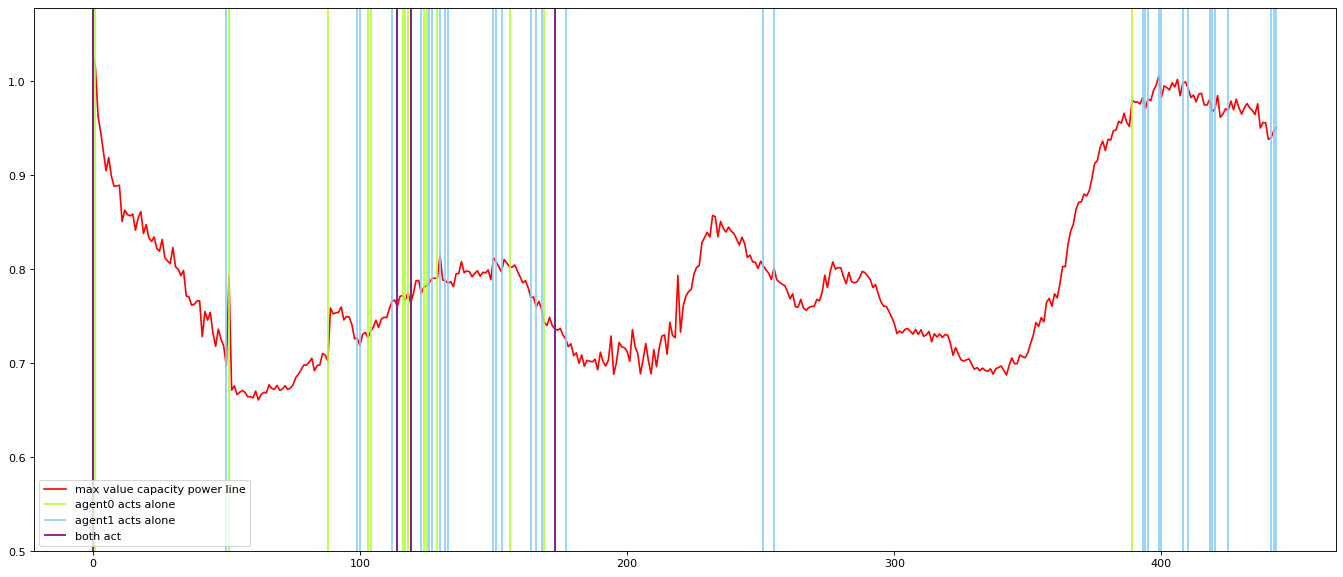

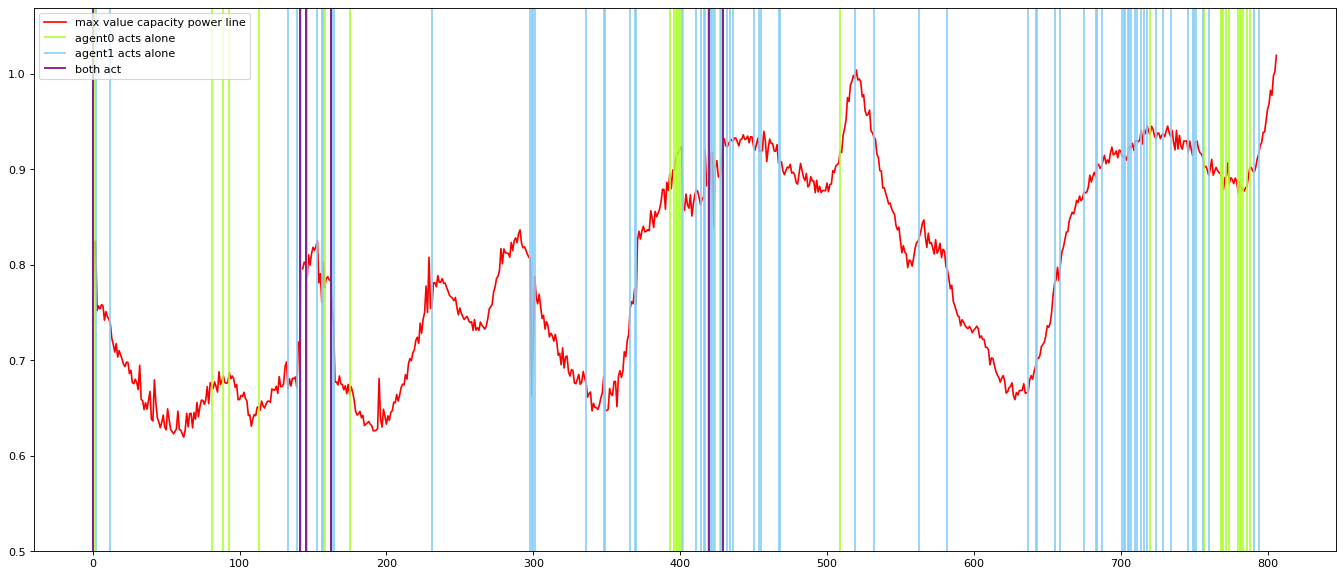

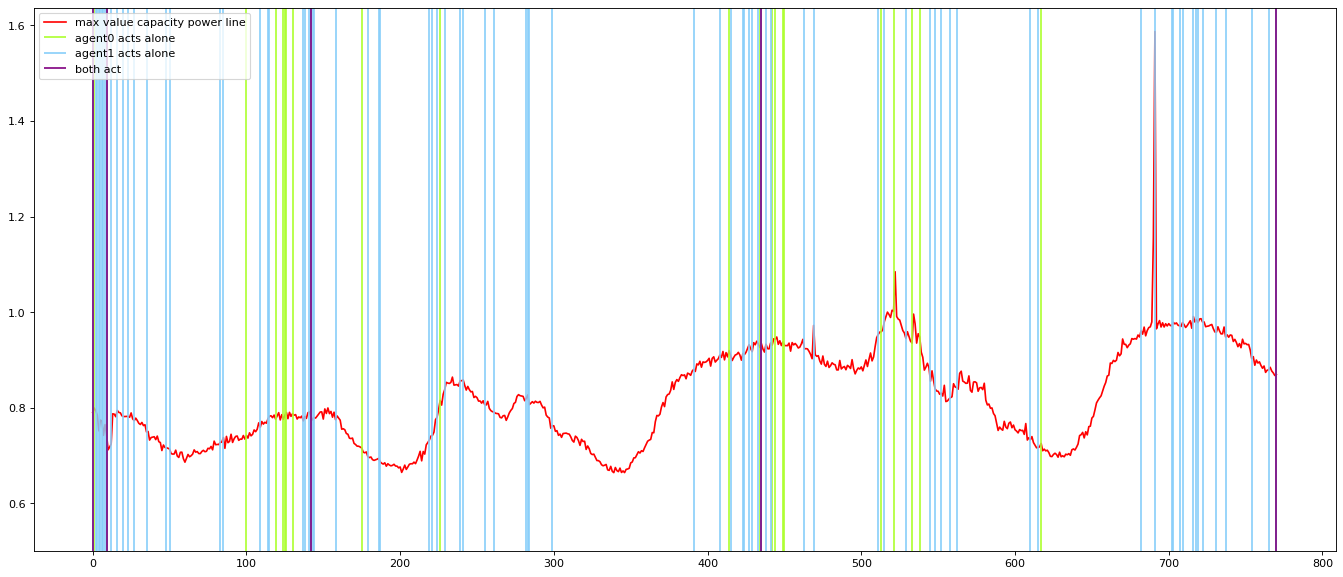

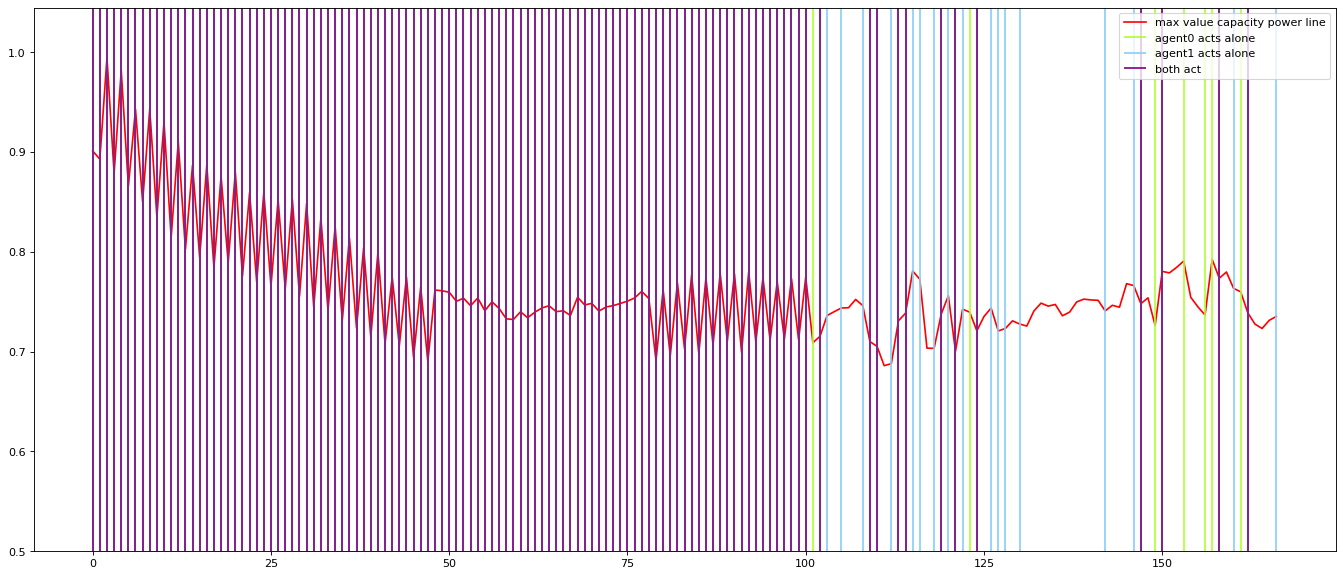

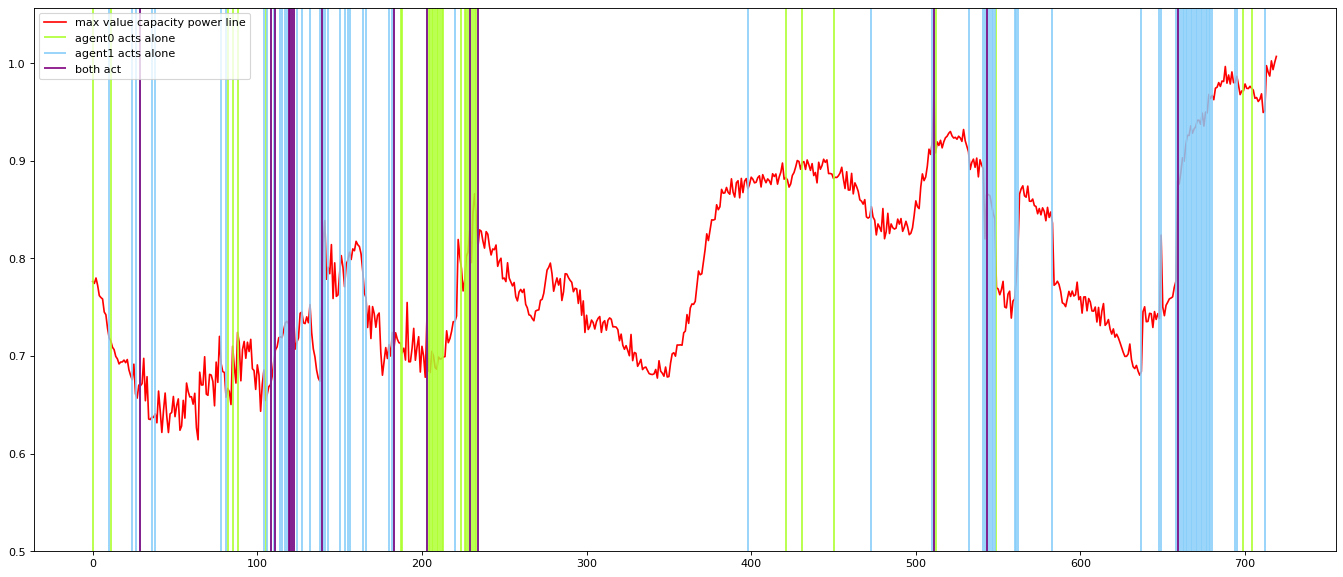

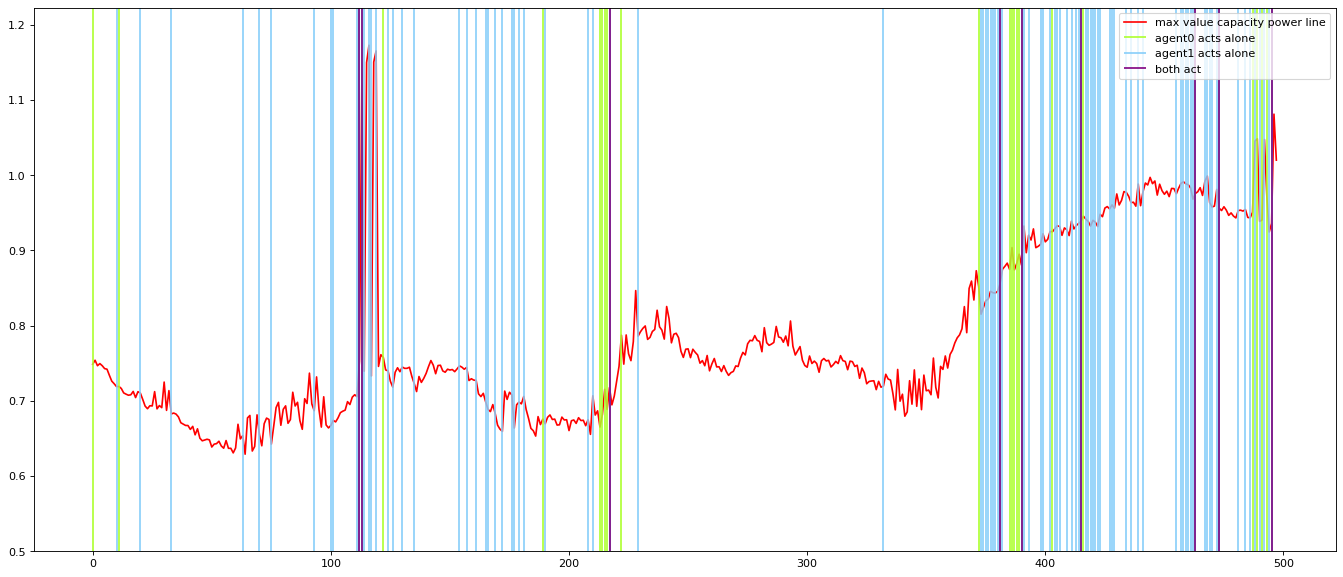

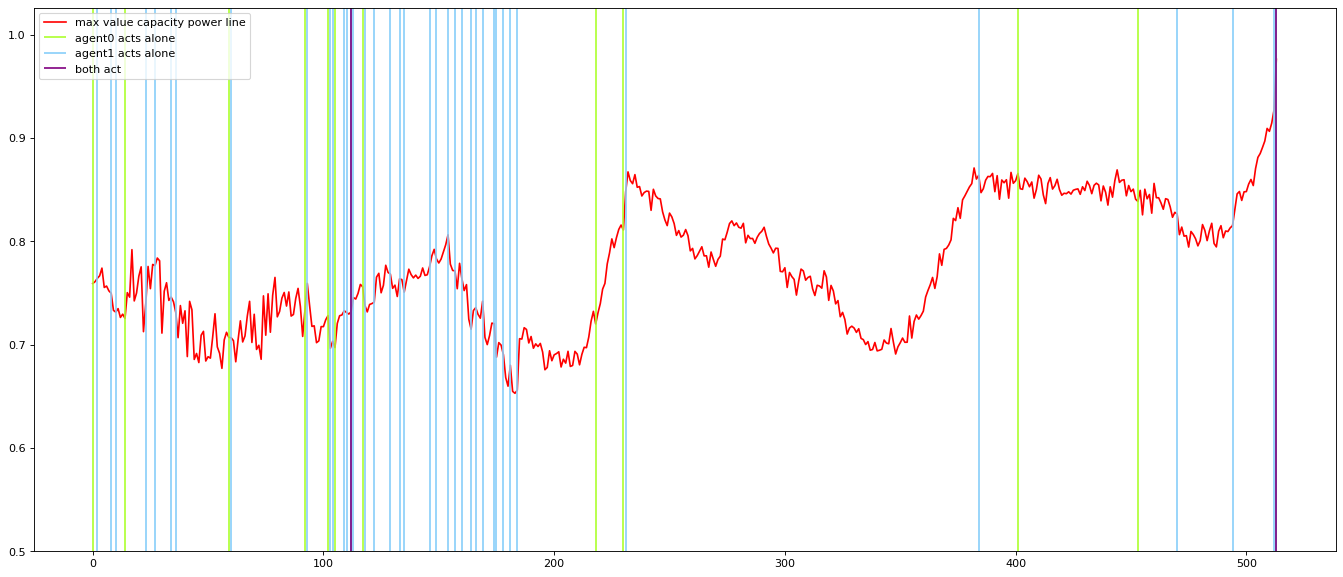

In [23]:
import matplotlib.pyplot as plt

for episode in range(episodes):
    #fig, ax1 = plt.subplots()

    #ax2 = ax1.twinx()
    y0 = np.where(~is_do_nothing11['agent_0'][episode])[0]
    y1 = np.where(~is_do_nothing11['agent_1'][episode])[0]
    y2 = np.where(~is_do_nothing11['agent_0'][episode]&~is_do_nothing11['agent_1'][episode])[0]
    m, M = (.5, max(max_rho11[episode])+.05)
    plt.figure(figsize=(21, 9), dpi=80)
    plt.plot(max_rho11[episode], color = 'red', label='max value capacity power line')
    plt.vlines(y0, ymin = m, ymax=M, label='agent0 acts alone', color='greenyellow')
    plt.vlines(y1, ymin = m, ymax=M, label='agent1 acts alone', color='lightskyblue')
    plt.vlines(y2, ymin = m, ymax=M, label='both act', color='purple')
    plt.ylim((m, M))
    #plt.title('The most overloaded power line\'s capacity over time with illegal actions occurence')
    plt.savefig(f'capa_w_actions_episode_{episode}')
    plt.legend()
    plt.show()

## Correlation with actions made

In [ ]:
def get_one_or_both(is_do_nothing, episodes):
    only_one_acts = [
        is_do_nothing[ma_env.agents[0]][episode] \
        ^\
        is_do_nothing[ma_env.agents[1]][episode]
        for episode in range(episodes)
    ]
    arr_only_one_acts = np.concatenate(only_one_acts)

    both_act = [
        ~is_do_nothing[ma_env.agents[0]][episode] \
        &\
        ~is_do_nothing[ma_env.agents[1]][episode]
        for episode in range(episodes)
    ]
    arr_both_act = np.concatenate(both_act)
    
    return arr_only_one_acts, arr_both_act

only_one_acts00, both_act00 = get_one_or_both(is_do_nothing00, episodes)
only_one_acts10, both_act10 = get_one_or_both(is_do_nothing10, episodes)
only_one_acts01, both_act01 = get_one_or_both(is_do_nothing01, episodes)
only_one_acts11, both_act11 = get_one_or_both(is_do_nothing11, episodes)

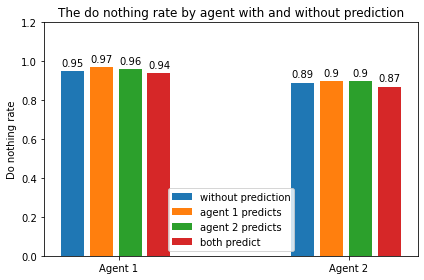

<Figure size 1680x720 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
donothing00 = []
donothing00.append(round((np.concatenate(is_do_nothing00[ma_env.agents[0]])).mean(), 2))
donothing00.append(round((np.concatenate(is_do_nothing00[ma_env.agents[1]])).mean(), 2))
donothing01 = []
donothing01.append(round((np.concatenate(is_do_nothing01[ma_env.agents[0]])).mean(), 2))
donothing01.append(round((np.concatenate(is_do_nothing01[ma_env.agents[1]])).mean(), 2))
donothing10 = []
donothing10.append(round((np.concatenate(is_do_nothing10[ma_env.agents[0]])).mean(), 2))
donothing10.append(round((np.concatenate(is_do_nothing10[ma_env.agents[1]])).mean(), 2))
donothing11 = []
donothing11.append(round((np.concatenate(is_do_nothing11[ma_env.agents[0]])).mean(), 2))
donothing11.append(round((np.concatenate(is_do_nothing11[ma_env.agents[1]])).mean(), 2))

w = 0.1
fig, ax = plt.subplots()

x = np.arange(ma_env.num_agents)

plt.figure(figsize=(21, 9), dpi=80)


res00 = ax.bar(x-8*w/4, donothing00, label = 'without prediction', width=w)
res10 = ax.bar(x-3*w/4, donothing10, label = 'agent 1 predicts', width=w)
res01 = ax.bar(x+2*w/4, donothing01, label = 'agent 2 predicts', width=w)
res11 = ax.bar(x+7*w/4, donothing11, label = 'both predict', width=w)
    

ax.set_xticks(x, ['Agent 1', 'Agent 2'])
ax.set_ylim((0,1.2))
ax.set_ylabel('Do nothing rate')
ax.set_title('The do nothing rate by agent with and without prediction')
ax.legend()

ax.bar_label(res00, padding=3)
ax.bar_label(res01, padding=3)
ax.bar_label(res10, padding=3)
ax.bar_label(res11, padding=3)

fig.tight_layout()
fig.savefig('do_nothing_rate.png')
plt.show()

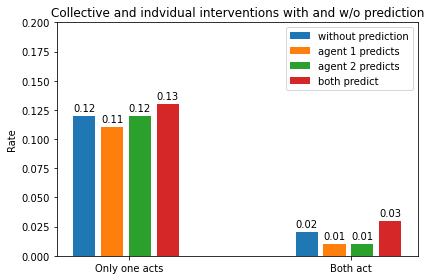

<Figure size 1680x720 with 0 Axes>

In [43]:
act00 = []
act00.append(round(only_one_acts00.mean(), 2))
act00.append(round(both_act00.mean(), 2))

act10 = []
act10.append(round(only_one_acts10.mean(), 2))
act10.append(round(both_act10.mean(), 2))

act01 = []
act01.append(round(only_one_acts01.mean(), 2))
act01.append(round(both_act01.mean(), 2))

act11 = []
act11.append(round(only_one_acts11.mean(), 2))
act11.append(round(both_act11.mean(), 2))
w = 0.1
fig, ax = plt.subplots()

labels = [
    'Only one acts',
    'Both act'
]
plt.figure(figsize=(21, 9), dpi=80)

x = np.arange(len(labels))

res00 = ax.bar(x-8*w/4, act00, label = 'without prediction', width=w)
res10 = ax.bar(x-3*w/4, act10, label = 'agent 1 predicts', width=w)
res01 = ax.bar(x+2*w/4, act01, label = 'agent 2 predicts', width=w)
res11 = ax.bar(x+7*w/4, act11, label = 'both predict', width=w)
    
ax.set_xticks(x, labels)
ax.set_ylim((0,.2))
ax.set_ylabel('Rate')
ax.set_title('Collective and indvidual interventions with and w/o prediction')
ax.legend()

ax.bar_label(res00, padding=3)
ax.bar_label(res01, padding=3)
ax.bar_label(res10, padding=3)
ax.bar_label(res11, padding=3)

fig.tight_layout()
fig.savefig('collective_individual.png')
plt.show()

In [3]:
def get_substations(res, episodes):

    substations = {
        agent : [[] for _ in range(episodes)]
        for agent in ma_env.agents
    }

    for episode in range(episodes):
        for t in range(len(res['local_actions'][episode])):
            for agent in ma_env.agents:
                try:
                    substations[agent][episode].append(
                        ma_env.action_spaces[agent].sub_orig_ids[
                            res['local_actions'][episode][t][agent].impact_on_objects()['topology']['assigned_bus'][0]['substation']
                        ]
                    )
                except IndexError:
                    substations[agent][episode].append(-1)
    return substations

substations00 = get_substations(results_ma00, episodes)
substations01 = get_substations(results_ma01, episodes)
substations10 = get_substations(results_ma10, episodes)
substations11 = get_substations(results_ma11, episodes)

                
subs = [
    substations00,
    substations01,
    substations10,
    substations11 
]

## To avoid negative indices
#new_is_illegal_ma = copy.deepcopy(is_illegal_ma)
#for episode in range(episodes):
#    new_is_illegal_ma[episode][0] = False
#    new_is_illegal_ma[episode][1] = False
#for agent in ma_env.agents:
#    for episode in range(episodes):
#        illegal_mask = np.where(new_is_illegal_ma[episode])[0]
#        is_same_substations[agent].append(
#            np.array(substations[agent][episode])[illegal_mask - 2]\
#            ==\
#            np.array(substations[agent][episode])[illegal_mask]
#        )
#    is_same_substations[agent] = np.concatenate(is_same_substations[agent])

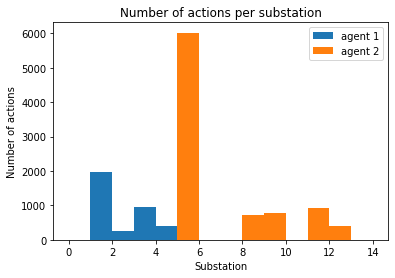

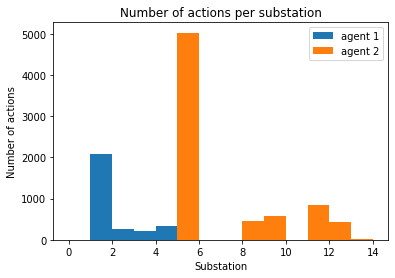

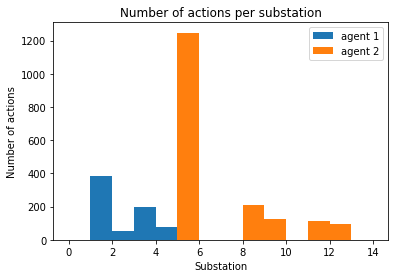

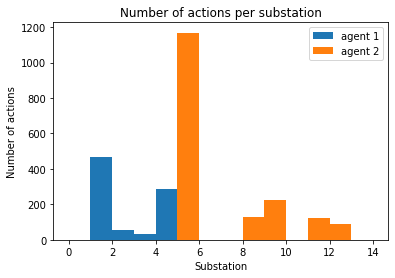

In [12]:
counts = []
for i in range(len(subs)):    
    d1 = np.concatenate(subs[i]['agent_1'])
    d0 = np.concatenate(subs[i]['agent_0'])
    xx = plt.hist(range = (0, ma_env._cent_env.n_sub), x = d0[d0>=0], bins=ma_env._cent_env.n_sub, label='agent 1')
    yy = plt.hist(range = (0, ma_env._cent_env.n_sub), x = d1[d1>=0], bins=ma_env._cent_env.n_sub, label='agent 2')
    plt.title("Number of actions per substation")
    plt.xlabel("Substation")
    plt.ylabel("Number of actions")
    plt.legend()
    plt.savefig(f'subs_{i}')
    plt.show()
    #count = np.concatenate((xx[0][:5], yy[0][5:]))
    #counts.append(np.array(count, dtype=int))

#### ma01

In [ ]:
d1 = np.concatenate(substations00['agent_1'])
d0 = np.concatenate(substations00['agent_0'])
xx = plt.hist(range = (0, ma_env._cent_env.n_sub), x = d0[d0>=0], bins=ma_env._cent_env.n_sub, label='agent 1')
yy = plt.hist(range = (0, ma_env._cent_env.n_sub), x = d1[d1>=0], bins=ma_env._cent_env.n_sub, label='agent 2')
plt.legend()
plt.show()
count = np.concatenate((xx[0][:5], yy[0][5:]))
#counts.append(np.array(count, dtype=int))

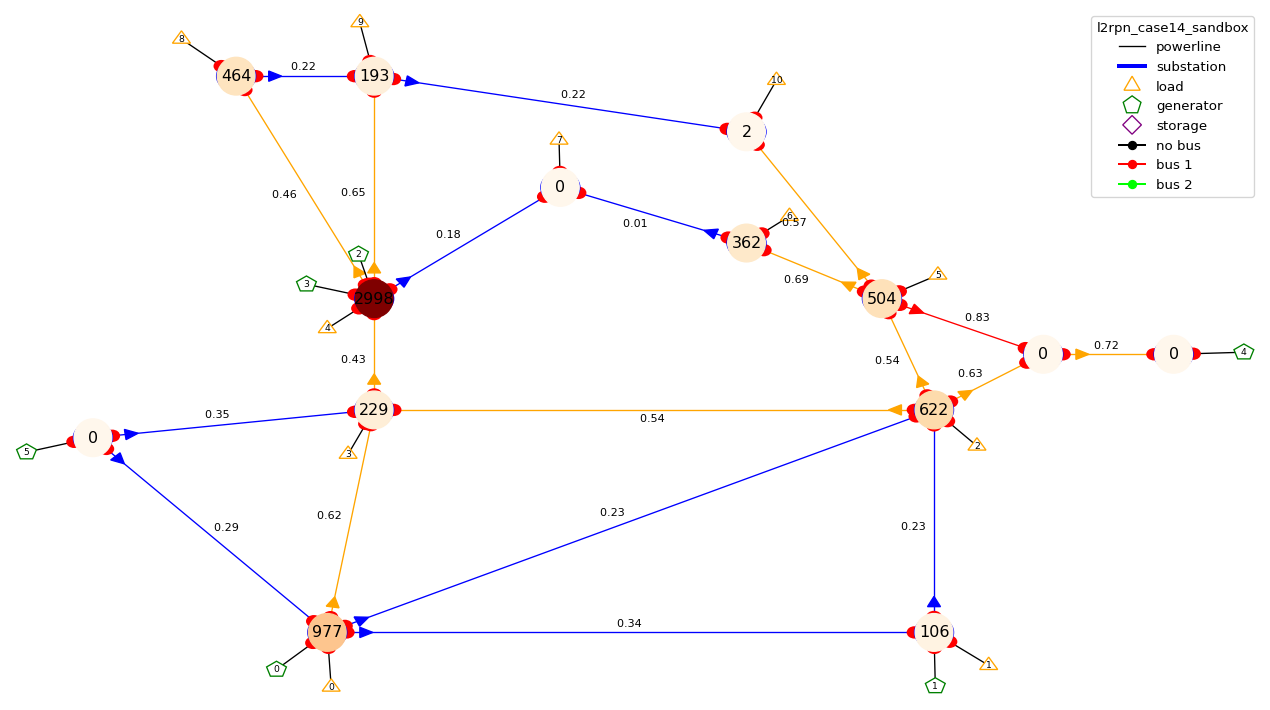

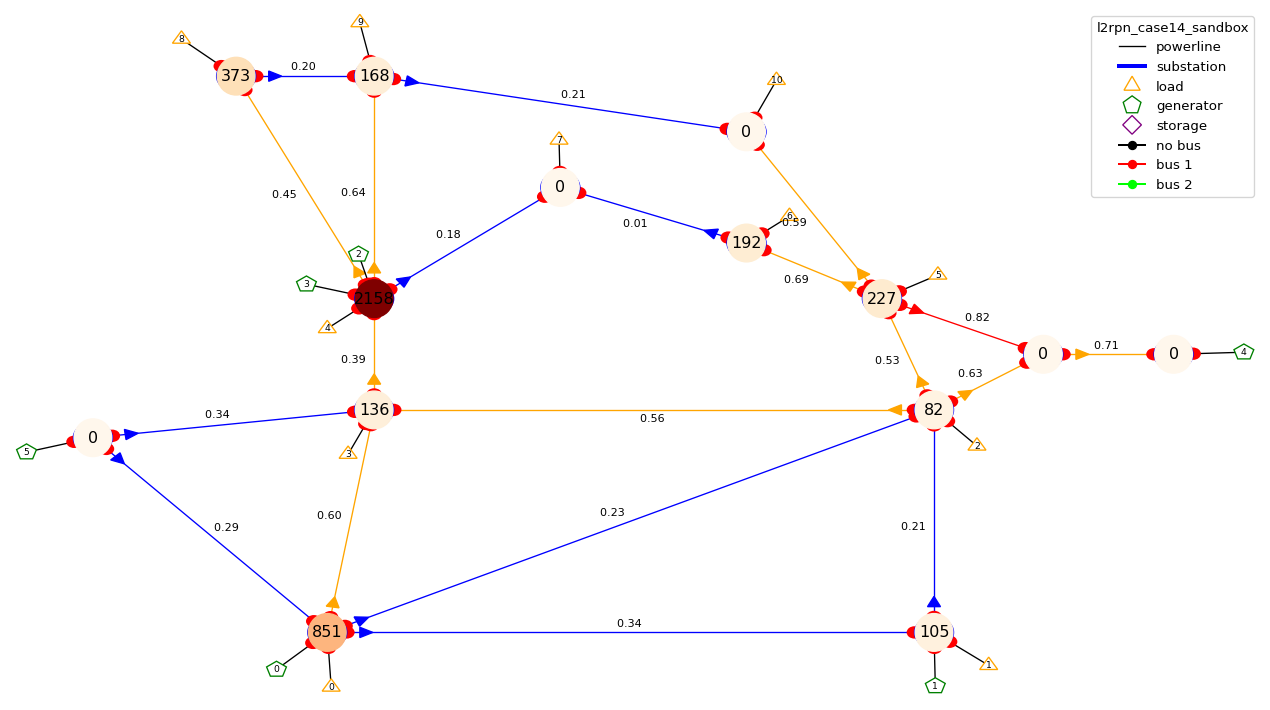

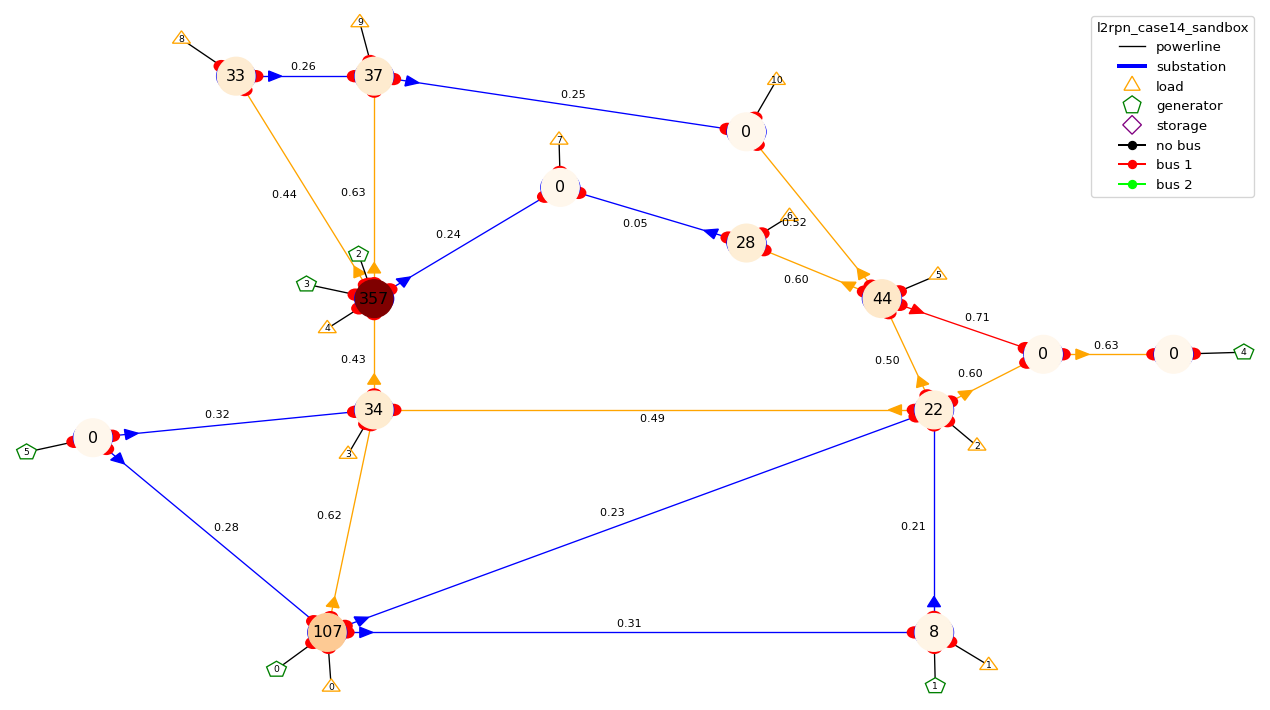

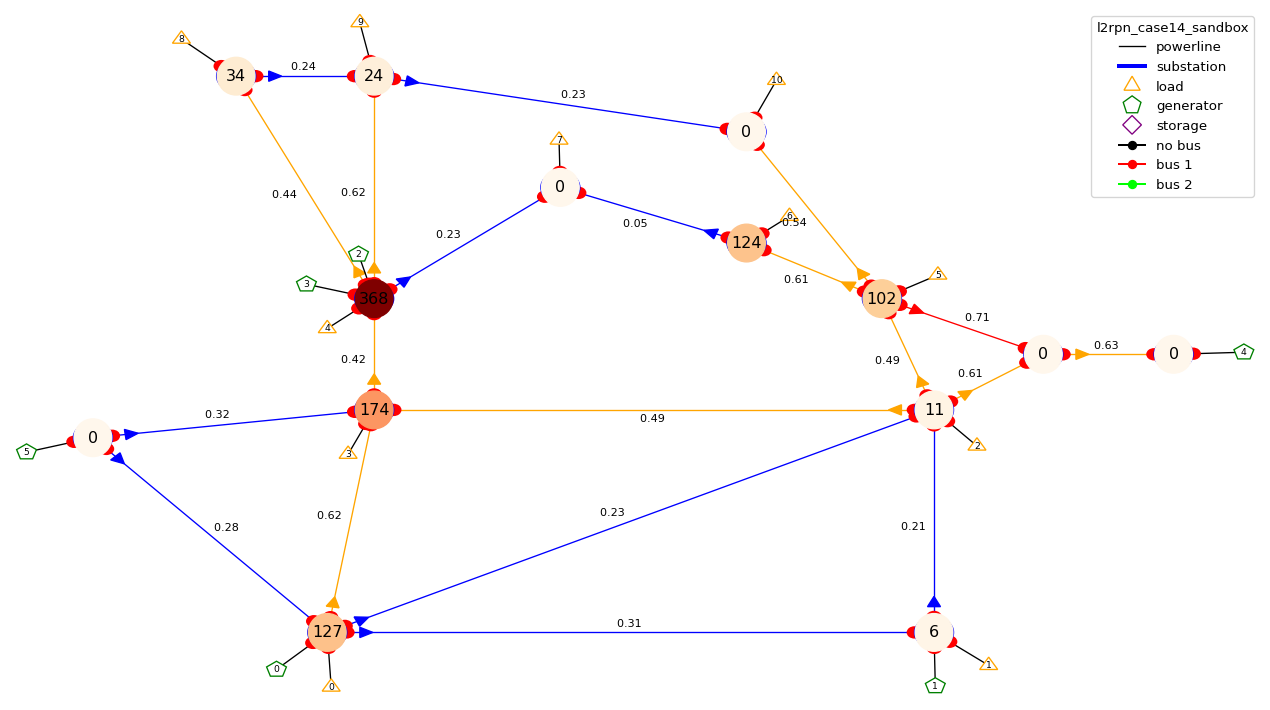

In [16]:
import networkx as nx
from grid2op.PlotGrid import PlotMatplot
rhos = [
    rho00,
    rho01,
    rho10,
    rho11
]

for i in range(len(counts)):
    obs = env.reset()
    plot_helper = PlotMatplot(env.observation_space)
    plot_helper._display_sub_name = False
    graph = obs.as_networkx()
    #fig_info = plot_helper.plot_info()
    fig_layout = plot_helper.plot_info(line_values=rhos[i], coloring="line")
    labels = dict(
        zip(
            range(env.n_sub), counts[i]
        )
    )
    #_ = plot_helper.plot_obs(obs, )
    nx.draw_networkx(graph,
                     with_labels=True,
                     # I want to plot the "rho" value for edges
                     node_color=counts[i],
                     node_size=800,#20+4*count,
                     cmap='OrRd',
                     edgelist=[],
                     labels = labels,
                     # i use the position computed with grid2op
                     # NB: this code only works if the number of bus per substation is 1 !
                     pos=[plot_helper._grid_layout[sub_nm] for sub_nm in obs.name_sub]
    )
    plt.show()

## Changed behavior

Here we compare the results obtained when agents assumed the other does nothing, and when they try to predict the other's action.

In [20]:
def get_same_actions(res):
    same_actions = {
        agent : []
        for agent in ma_env.agents
    }
    for episode in range(len(results_ma00['local_actions'])):
        for t in range(len(results_ma00['local_actions'][episode])):
            for agent in ma_env.agents:
                try:
                    same_actions[agent].append(
                        results_ma00['local_actions'][episode][t][agent]\
                        ==\
                        res['local_actions'][episode][t][agent]
                    )
                except Exception:
                    pass
    return same_actions

same_actions01 = get_same_actions(results_ma01)
same_actions10 = get_same_actions(results_ma10)
same_actions11 = get_same_actions(results_ma11)

due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _se

In [21]:
print('01')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions01[agent]))

print('10')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions10[agent]))
    
print('11')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions11[agent]))

01
	 agent_0 0.9303038751045442
	 agent_1 0.9423845367530899
10
	 agent_0 0.9107142857142857
	 agent_1 0.8330658105939005
11
	 agent_0 0.8747774480712166
	 agent_1 0.8077151335311573


In [22]:
def get_same_actions_wo_donothing(res, is_donothing):
    same_actions = {
        agent : []
        for agent in ma_env.agents
    }
    for episode in range(len(results_ma00['local_actions'])):
        for t in range(len(results_ma00['local_actions'][episode])):
            for agent in ma_env.agents:
                try:
                    if not (is_donothing[agent][episode][t]):
                    
                        same_actions[agent].append(
                            results_ma00['local_actions'][episode][t][agent]\
                            ==\
                            res['local_actions'][episode][t][agent]
                        )
                except Exception:
                    pass
    return same_actions

same_actions01 = get_same_actions_wo_donothing(results_ma01, is_do_nothing01)
same_actions10 = get_same_actions_wo_donothing(results_ma10, is_do_nothing10)
same_actions11 = get_same_actions_wo_donothing(results_ma11, is_do_nothing11)

due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _set_topo_vect
due to _se

In [23]:
print('01')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions01[agent]))

print('10')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions10[agent]))
    
print('11')
for agent in ma_env.agents:
    print('\t', agent, np.mean(same_actions11[agent]))

01
	 agent_0 0.9303038751045442
	 agent_1 0.9423845367530899
10
	 agent_0 0.9107142857142857
	 agent_1 0.8330658105939005
11
	 agent_0 0.8747774480712166
	 agent_1 0.8077151335311573
